# Промышленность

Чтобы оптимизировать производственные расходы, металлургический комбинат ООО «Так закаляем сталь» решил уменьшить потребление электроэнергии на этапе обработки стали. Вам предстоит построить модель, которая предскажет температуру стали.

# Описание данных:
Данные состоят из файлов, полученных из разных источников:

1. data_arc.csv — данные об электродах;
2. data_bulk.csv — данные о подаче сыпучих материалов (объём);
3. data_bulk_time.csv — данные о подаче сыпучих материалов (время);
4. data_gas.csv — данные о продувке сплава газом;
5. data_temp.csv — результаты измерения температуры;
6. data_wire.csv — данные о проволочных материалах (объём);
7. data_wire_time.csv — данные о проволочных материалах (время).

Во всех файлах столбец key содержит номер партии. В файлах может быть несколько строк с одинаковым значением key: они соответствуют разным итерациям обработки.

 # План работы
 1. Подготовить данные. Изменить типы данных. 
 2. Собрать и склеить данные в 1 таблицу.
 3. корреляционный анализ
 4. Разбить эти данные на features и target  и выделить целевой признак, я так понимаю будет температура
 5. Выбрать оптимальную модель, регрессионную...
 6. Подобрать выбранной модели оптимальные параметры.
 7. Проверить модель на адекватность.

## План проекта
**1. Проведение обзора данных (EDA)**

**Подготовка данных:** 
* Импорт необходимых библиотек;
* Чтение файлов и сохранение полученных данных в переменные;
* Получение общей информации о таблицах (head, info, describe);
* Корректировка наименований столбцов (при необходимости).
* Выводы

**Анализ данных:**
* Графическое представление данных из таблиц;
* Проверка данных на аномалии.
* Выводы

**Предобработка данных:**
* Корректировка типов данных (при необходимости);
* Заполнение пропусков / удаление дубликатов (при наличии);
* Выделение признаков и таргета;
* Соединение таблиц.
* Выводы

**Исследование итоговой таблицы с данными:**
* Аналитический анализ
* графический анализ
* корреляционный анализ
* выводы

**2. Построение модели машинного обучения**

**Обучение модели:**
* Разделение данных на обучающую и тестовую выборки;
* Масштабирование данных;
* Обучение модели линейной регрессии;
* Обучение модели градиентного бустинга с перебором гиперпараметров;
* Константная модели.
* Выбор лучшей модели

**Проверка моделей:**
* Тестирование лучшей модели на тестовой выборке;
* Если MAE на тестовых данных > 6.8 - доработка модели.
* Анализ важности факторов

**3. Общий вывод**

In [2]:
!pip install catboost
!pip install lightgbm

In [3]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import lightgbm as lgb

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.dummy import DummyRegressor
from catboost import CatBoostRegressor, Pool
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

## Подготовка и анализ данных

# данные об электродах

In [4]:
try:
    data_arc = pd.read_csv('datasets/final_steel/data_arc.csv')
    data_bulk = pd.read_csv('datasets/final_steel/data_bulk.csv')
    data_bulk_time = pd.read_csv('datasets/final_steel/data_bulk_time.csv')
    data_gas = pd.read_csv('datasets/final_steel/data_gas.csv')
    data_temp = pd.read_csv('datasets/final_steel/data_temp.csv')
    data_wire = pd.read_csv('datasets/final_steel/data_wire.csv')
    data_wire_time = pd.read_csv('datasets/final_steel/data_wire_time.csv')
except:
    data_arc = pd.read_csv('/datasets/final_steel/data_arc.csv')
    data_bulk = pd.read_csv('/datasets/final_steel/data_bulk.csv')
    data_bulk_time = pd.read_csv('/datasets/final_steel/data_bulk_time.csv')
    data_gas = pd.read_csv('/datasets/final_steel/data_gas.csv')
    data_temp = pd.read_csv('/datasets/final_steel/data_temp.csv')
    data_wire = pd.read_csv('/datasets/final_steel/data_wire.csv')
    data_wire_time = pd.read_csv('/datasets/final_steel/data_wire_time.csv')

In [5]:
data_arc

,key,Начало нагрева дугой,Конец нагрева дугой,Активная мощность,Реактивная мощность
0,1,2019-05-03 11:02:14,2019-05-03 11:06:02,0.976059,0.687084
1,1,2019-05-03 11:07:28,2019-05-03 11:10:33,0.805607,0.520285
2,1,2019-05-03 11:11:44,2019-05-03 11:14:36,0.744363,0.498805
3,1,2019-05-03 11:18:14,2019-05-03 11:24:19,1.659363,1.062669
4,1,2019-05-03 11:26:09,2019-05-03 11:28:37,0.692755,0.414397
...,...,...,...,...,...
14871,3241,2019-09-01 03:58:58,2019-09-01 04:01:35,0.533670,0.354439
14872,3241,2019-09-01 04:05:04,2019-09-01 04:08:04,0.676604,0.523631
14873,3241,2019-09-01 04:16:41,2019-09-01 04:19:45,0.733899,0.475654
14874,3241,2019-09-01 04:31:51,2019-09-01 04:32:48,0.220694,0.145768


Пропусков нету, но дату перевести бы в датетайм

In [6]:
data_arc['Начало нагрева дугой'] = pd.to_datetime(
    data_arc['Начало нагрева дугой'])
data_arc['Конец нагрева дугой'] = pd.to_datetime(
    data_arc['Конец нагрева дугой'])
data_arc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14876 entries, 0 to 14875
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   key                   14876 non-null  int64         
 1   Начало нагрева дугой  14876 non-null  datetime64[ns]
 2   Конец нагрева дугой   14876 non-null  datetime64[ns]
 3   Активная мощность     14876 non-null  float64       
 4   Реактивная мощность   14876 non-null  float64       
dtypes: datetime64[ns](2), float64(2), int64(1)
memory usage: 581.2 KB


уберём пробелы в названиях

In [7]:
data_arc.columns = ['key', 'Start_heat',
                    'End_heat', 'Act_power', 'React_power']

In [8]:
data_arc.describe()

,key,Act_power,React_power
count,14876.000000,14876.000000,14876.000000
mean,1615.220422,0.670441,0.452592
std,934.571502,0.408159,5.878702
min,1.000000,0.030002,-715.504924
25%,806.000000,0.395297,0.290991
50%,1617.000000,0.555517,0.415962
75%,2429.000000,0.857034,0.637371
max,3241.000000,3.731596,2.676388


In [9]:
data_arc.loc[data_arc['React_power'] < 0]

,key,Start_heat,End_heat,Act_power,React_power
9780,2116,2019-07-24 00:44:48,2019-07-24 00:46:37,0.495782,-715.504924


одна строка такая, явно это опечатка  мощность -715, да и вообще какая -то странная мощность в сравнение с другими, сначала хотел к модулю привести, но и 715 по модулю тоже вылетает из общей массы слишком капитально. Явно что-то не то. удалив строку,если я верно понял,мы потеряем у одной партий итерацию. Если только везде удалить эту партию... тоже сомнительно

In [10]:
data_arc = data_arc.loc[data_arc['React_power'] >= 0]

<AxesSubplot:xlabel='Act_power', ylabel='Density'>

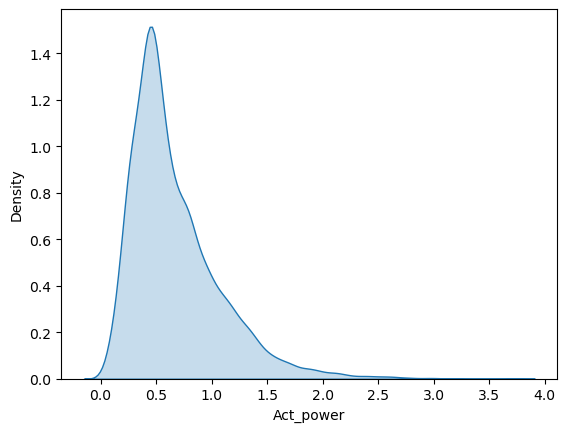

In [11]:
sns.kdeplot(data=data_arc['Act_power'], shade=True)

<AxesSubplot:xlabel='React_power', ylabel='Density'>

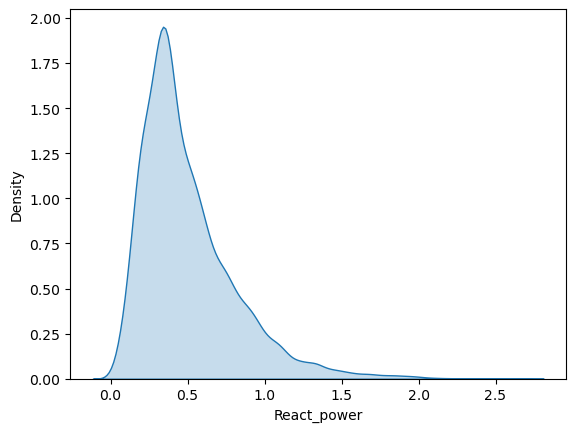

In [12]:
sns.kdeplot(data=data_arc['React_power'], shade=True)

# данные о подаче сыпучих материалов (объём)

In [13]:
#data_bulk = pd.read_csv('/Users/Dom/datasets/data_bulk.csv')
data_bulk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   key      3129 non-null   int64  
 1   Bulk 1   252 non-null    float64
 2   Bulk 2   22 non-null     float64
 3   Bulk 3   1298 non-null   float64
 4   Bulk 4   1014 non-null   float64
 5   Bulk 5   77 non-null     float64
 6   Bulk 6   576 non-null    float64
 7   Bulk 7   25 non-null     float64
 8   Bulk 8   1 non-null      float64
 9   Bulk 9   19 non-null     float64
 10  Bulk 10  176 non-null    float64
 11  Bulk 11  177 non-null    float64
 12  Bulk 12  2450 non-null   float64
 13  Bulk 13  18 non-null     float64
 14  Bulk 14  2806 non-null   float64
 15  Bulk 15  2248 non-null   float64
dtypes: float64(15), int64(1)
memory usage: 391.2 KB


где пропуски,там поставим 0, я думаю вообще не подсыпали. и ренеймним,а также переведём в инт

In [14]:
data_bulk = data_bulk.fillna(0)
data_bulk.columns = ['key', 'Bulk_1', 'Bulk_2', 'Bulk_3', 'Bulk_4', 'Bulk_5', 'Bulk_6',
                     'Bulk_7', 'Bulk_8', 'Bulk_9', 'Bulk_10', 'Bulk_11', 'Bulk_12', 'Bulk_13', 'Bulk_14', 'Bulk_15']

In [15]:
data_bulk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   key      3129 non-null   int64  
 1   Bulk_1   3129 non-null   float64
 2   Bulk_2   3129 non-null   float64
 3   Bulk_3   3129 non-null   float64
 4   Bulk_4   3129 non-null   float64
 5   Bulk_5   3129 non-null   float64
 6   Bulk_6   3129 non-null   float64
 7   Bulk_7   3129 non-null   float64
 8   Bulk_8   3129 non-null   float64
 9   Bulk_9   3129 non-null   float64
 10  Bulk_10  3129 non-null   float64
 11  Bulk_11  3129 non-null   float64
 12  Bulk_12  3129 non-null   float64
 13  Bulk_13  3129 non-null   float64
 14  Bulk_14  3129 non-null   float64
 15  Bulk_15  3129 non-null   float64
dtypes: float64(15), int64(1)
memory usage: 391.2 KB


In [16]:
data_bulk.describe()

,key,Bulk_1,Bulk_2,Bulk_3,Bulk_4,Bulk_5,Bulk_6,Bulk_7,Bulk_8,Bulk_9,Bulk_10,Bulk_11,Bulk_12,Bulk_13,Bulk_14,Bulk_15
count,3129.000000,3129.000000,3129.000000,3129.000000,3129.000000,3129.000000,3129.000000,3129.000000,3129.000000,3129.000000,3129.000000,3129.000000,3129.000000,3129.000000,3129.000000,3129.000000
mean,1624.383509,3.160435,1.779163,47.240332,33.830617,2.633749,21.892298,2.441675,0.015660,0.463407,4.684564,4.345478,203.948226,1.041866,152.706616,115.319271
std,933.337642,11.869164,21.217878,74.239954,56.034505,20.918138,55.492582,31.944063,0.875978,6.154398,20.157323,22.699580,151.419639,14.114252,81.091421,84.488698
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,816.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,105.000000,0.000000,104.000000,0.000000
50%,1622.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,0.000000,148.000000,106.000000
75%,2431.000000,0.000000,0.000000,80.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,263.000000,0.000000,202.000000,204.000000
max,3241.000000,185.000000,325.000000,454.000000,281.000000,603.000000,503.000000,772.000000,49.000000,147.000000,159.000000,313.000000,1849.000000,305.000000,636.000000,405.000000


In [17]:
uniq = data_bulk.duplicated()
uniq.unique()

array([False])

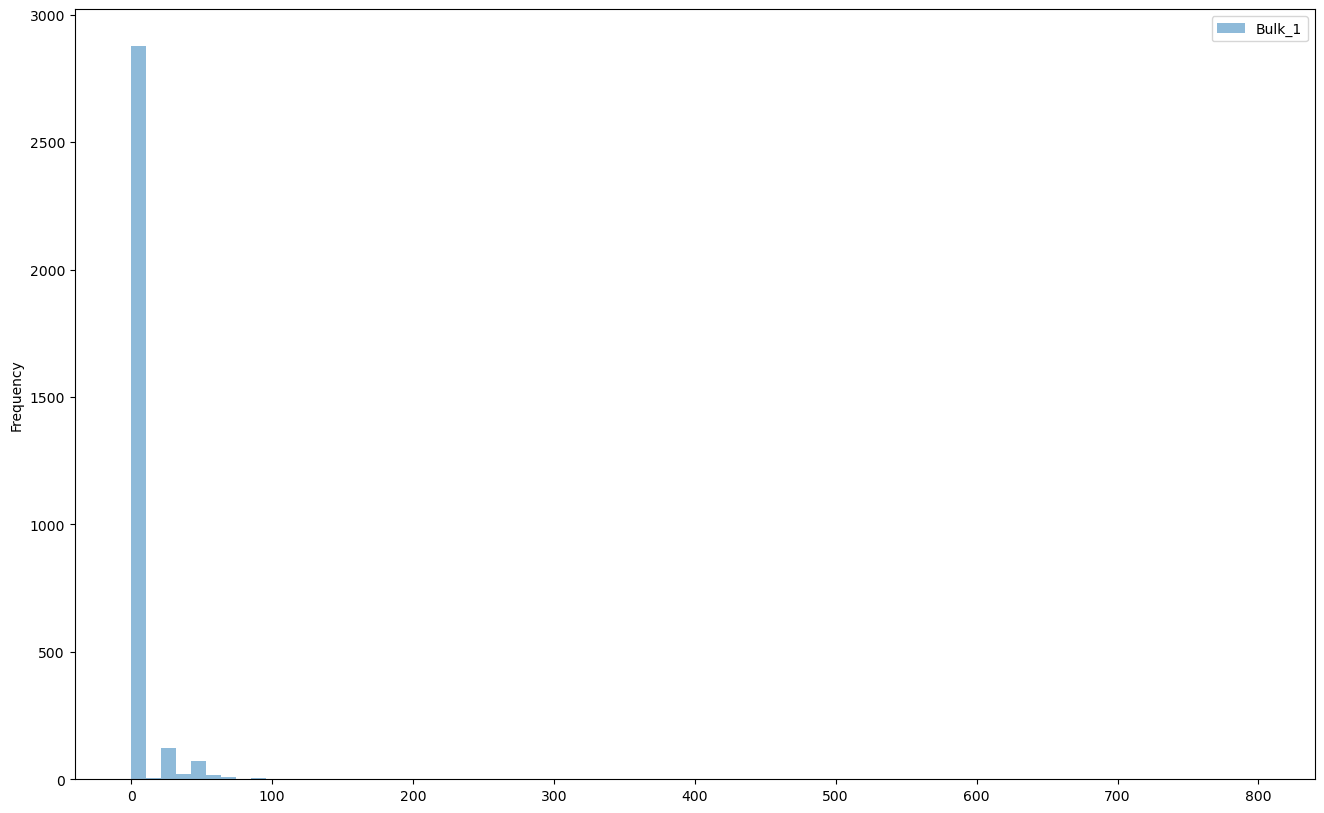

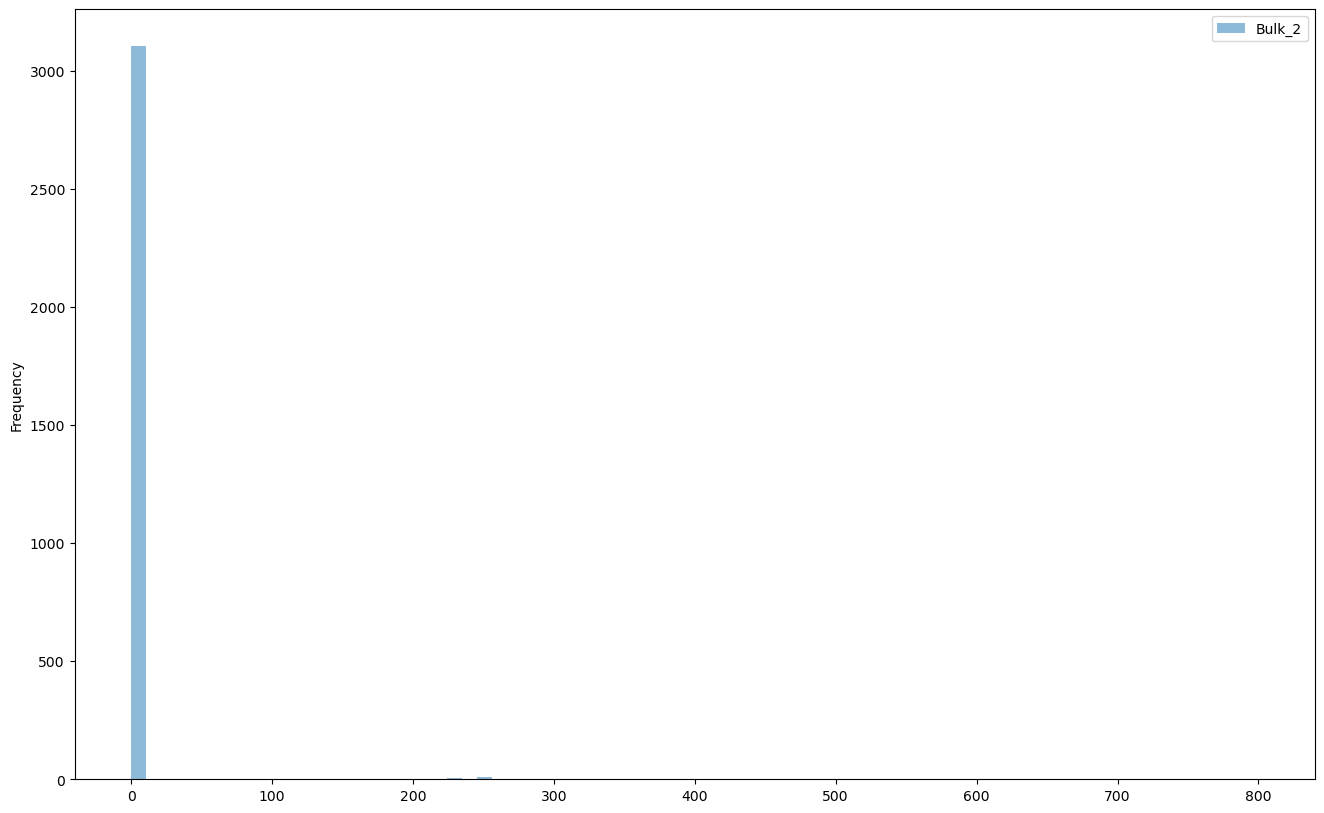

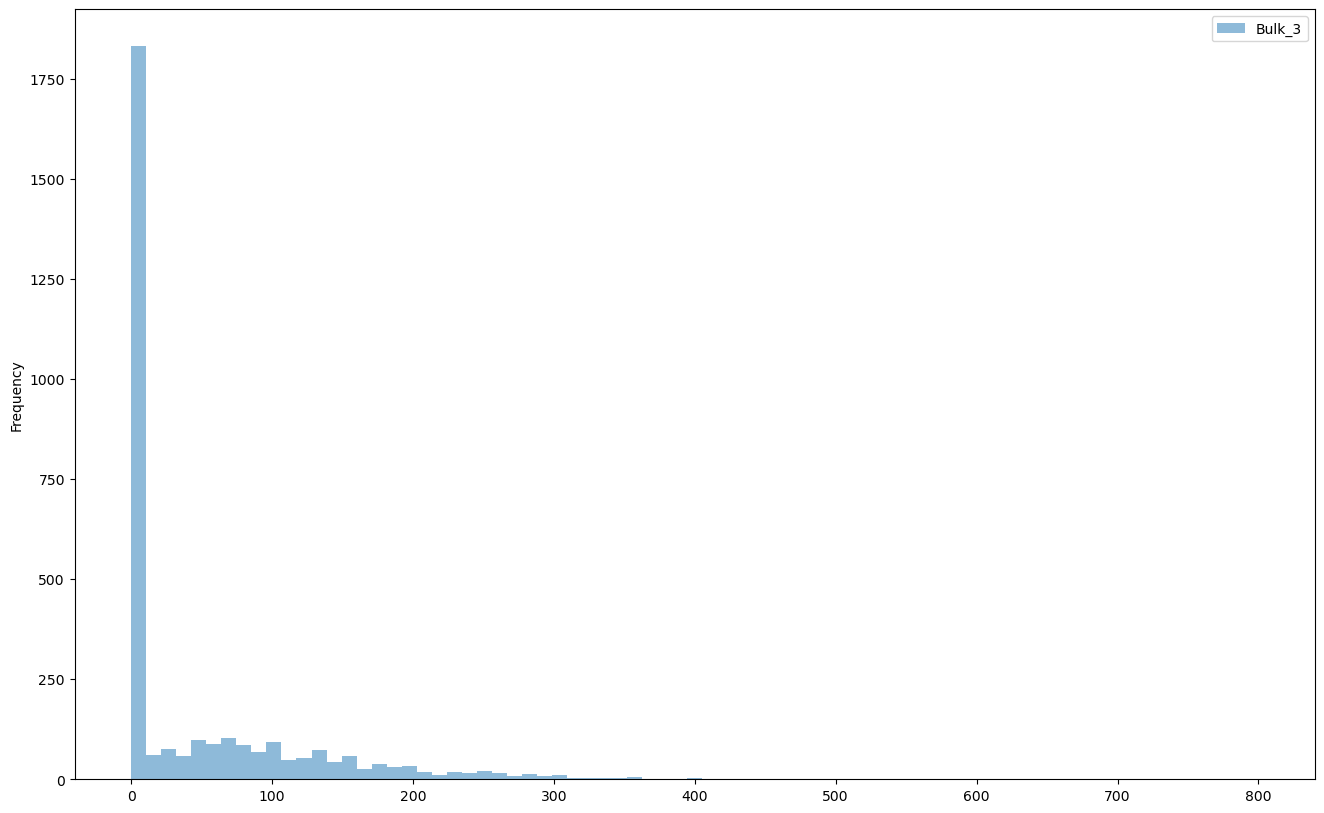

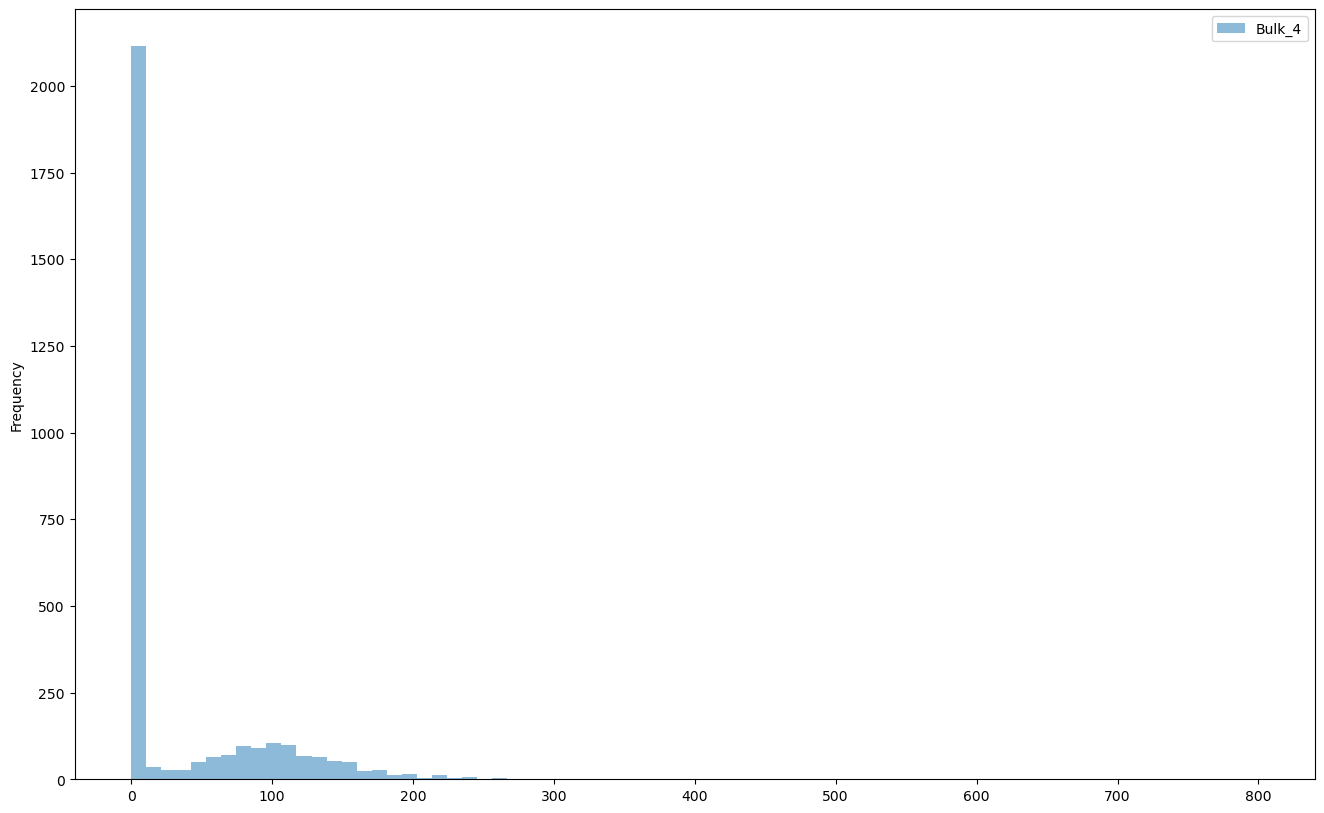

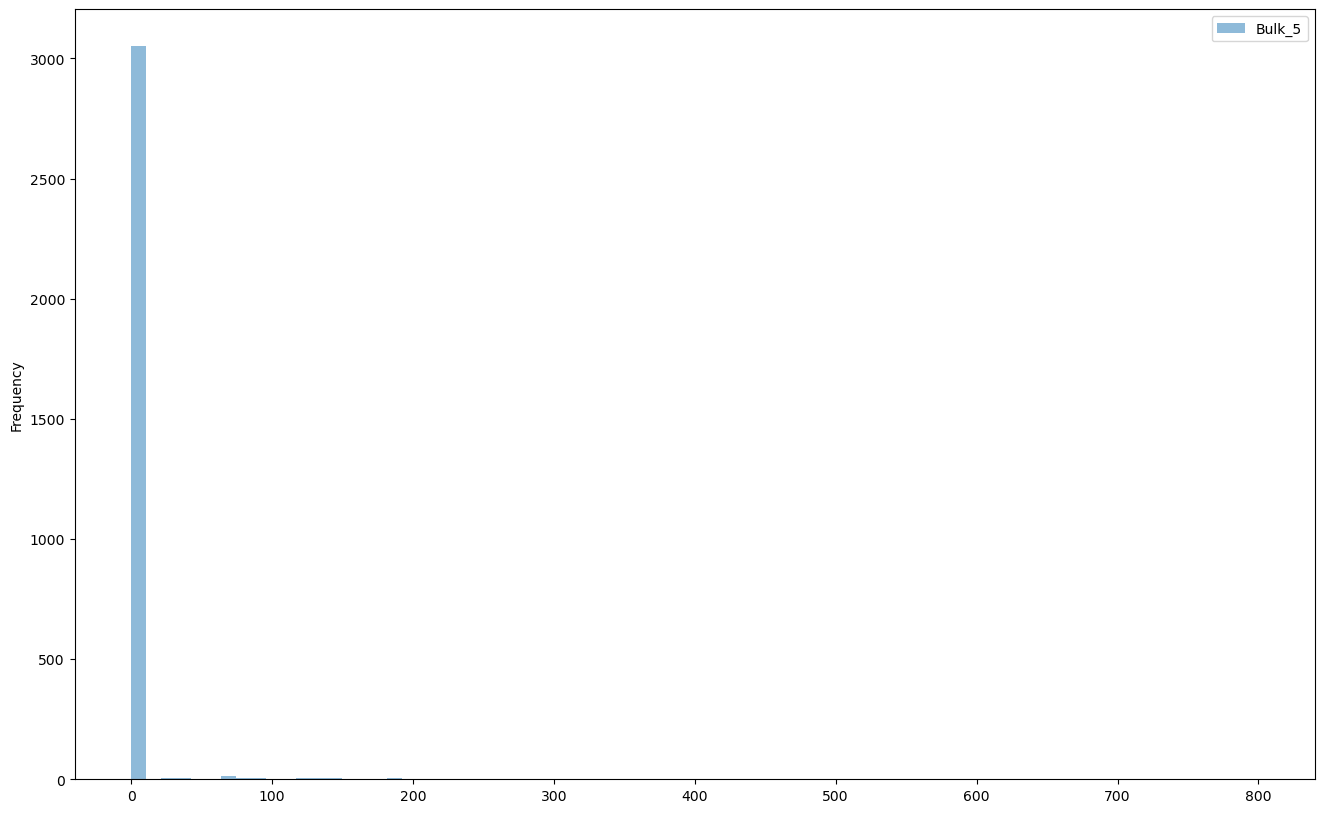

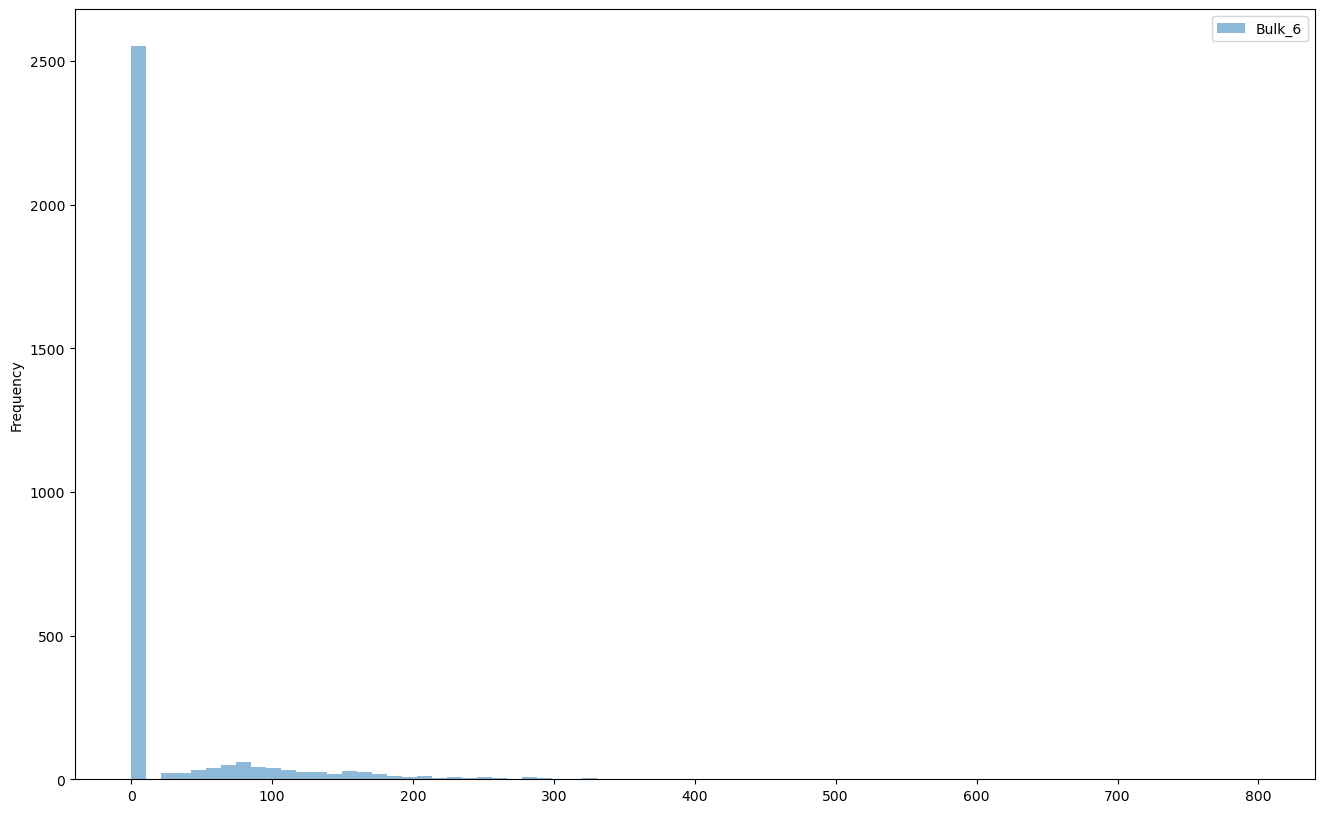

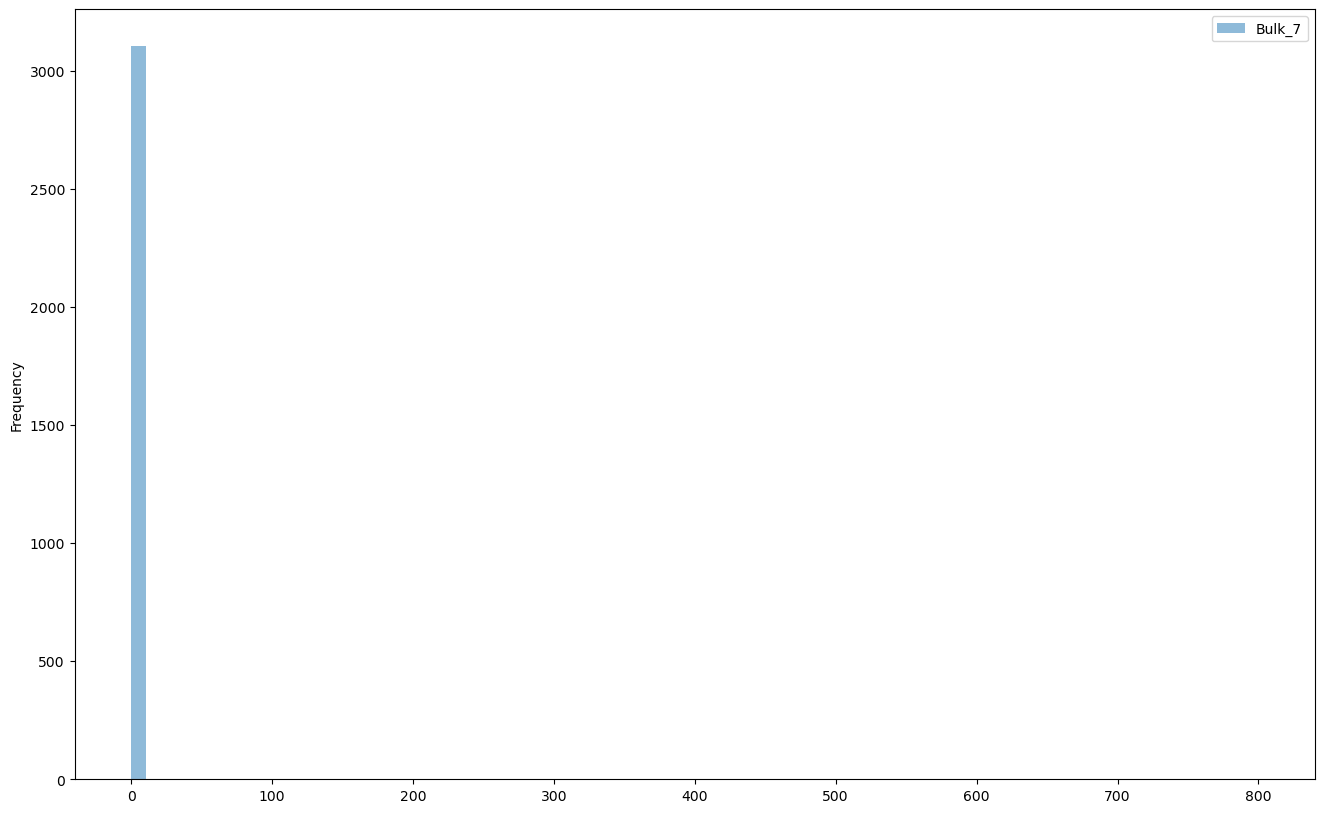

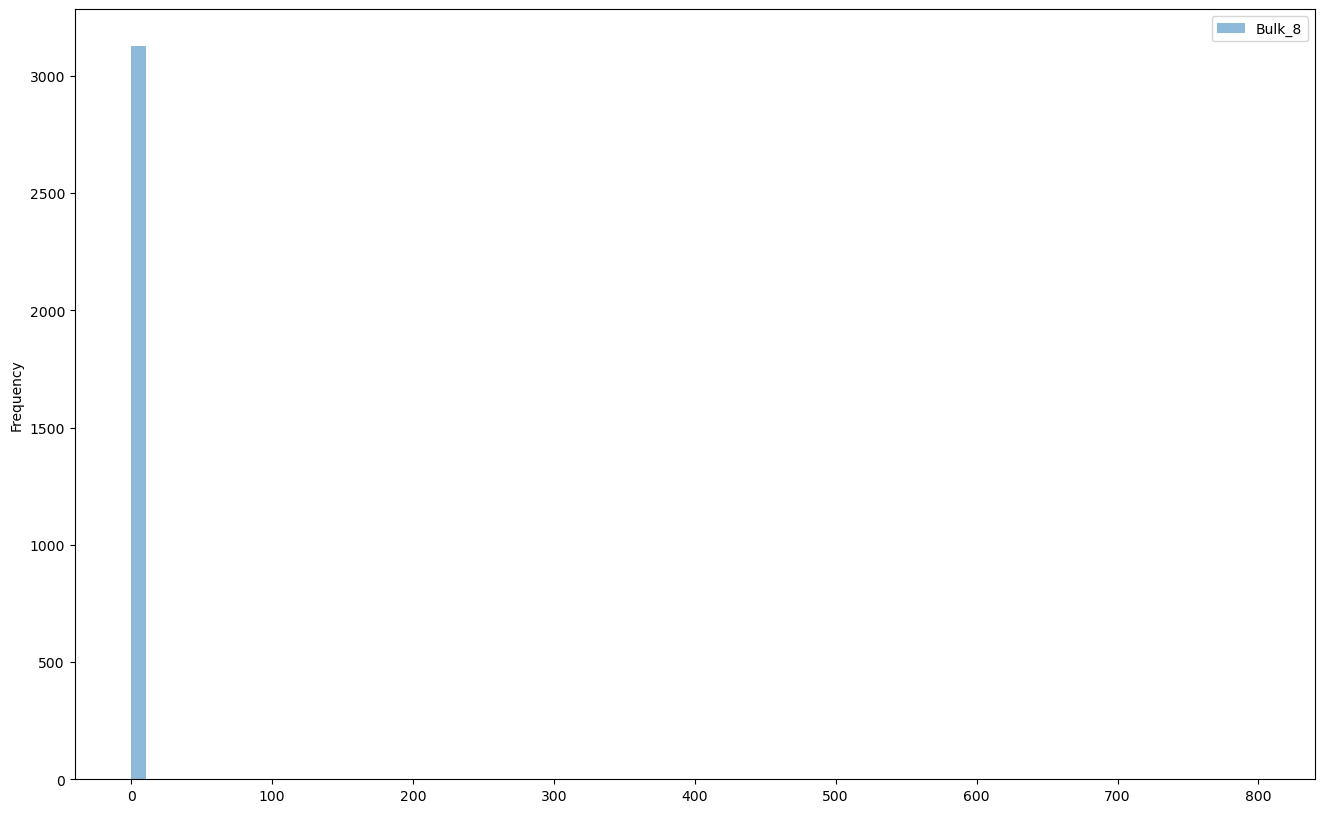

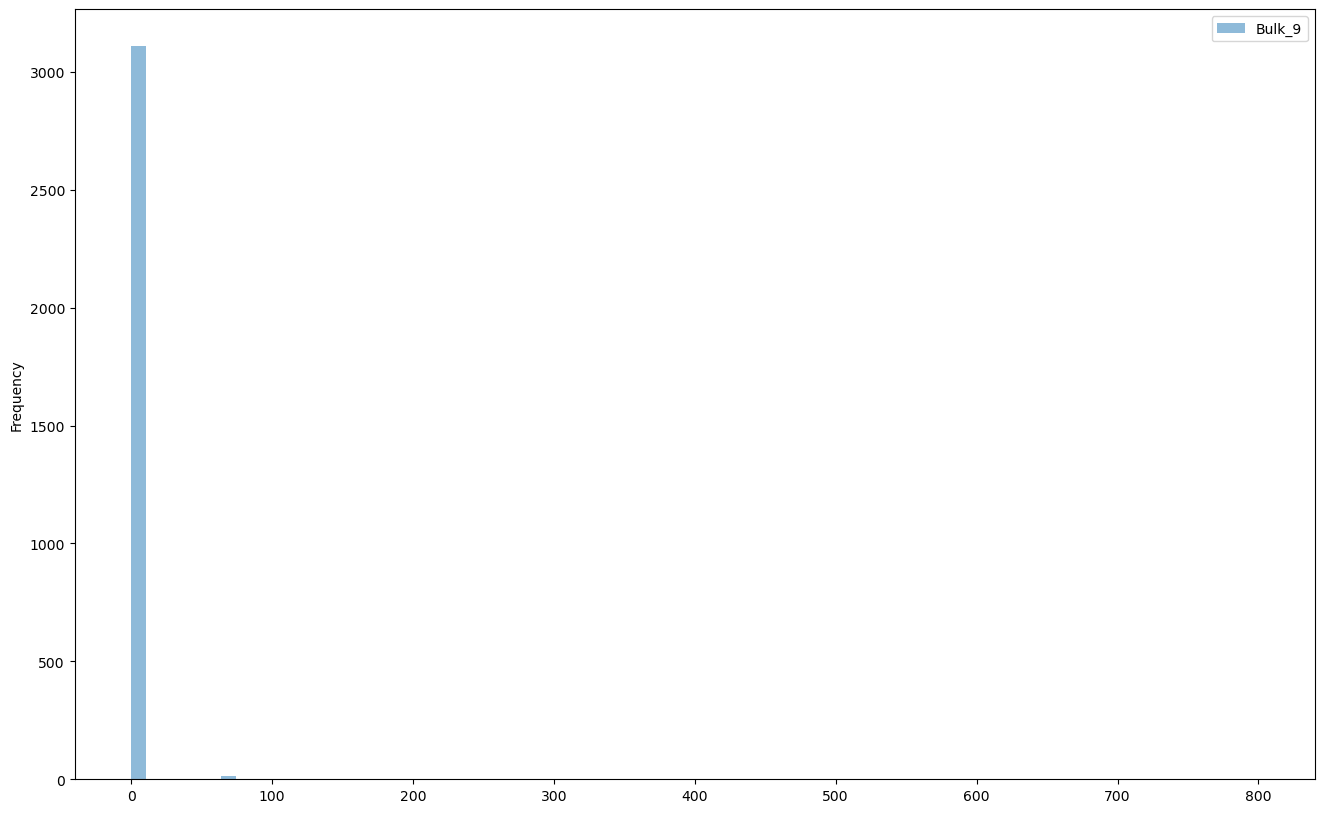

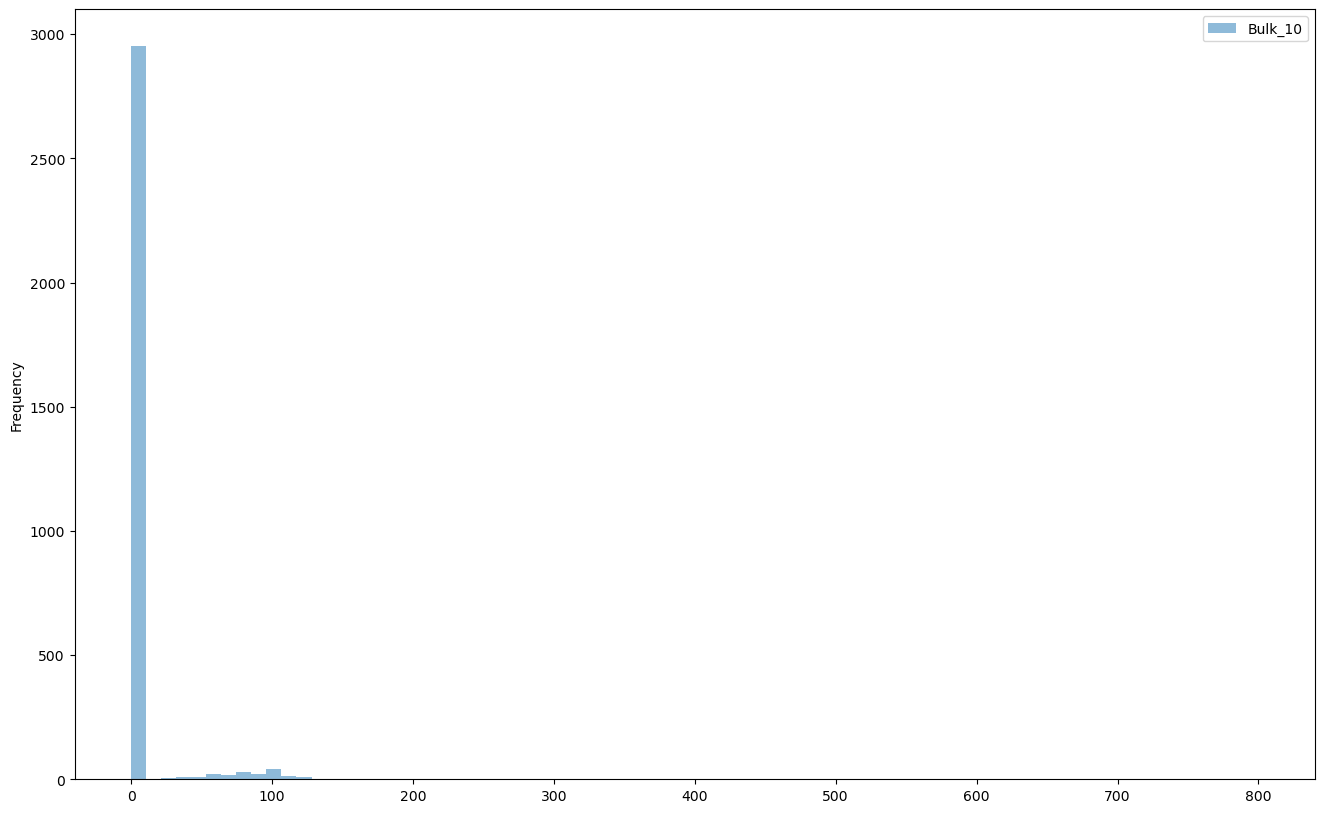

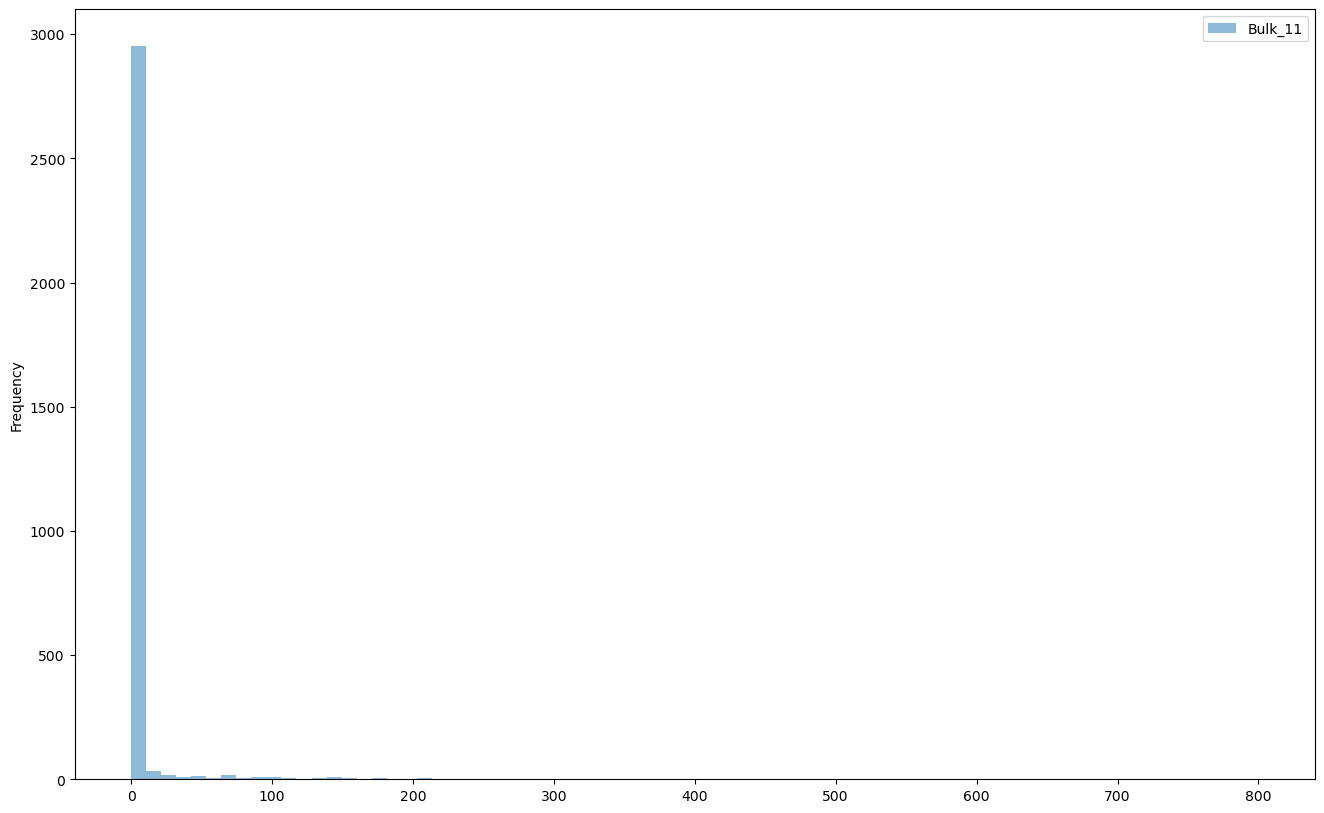

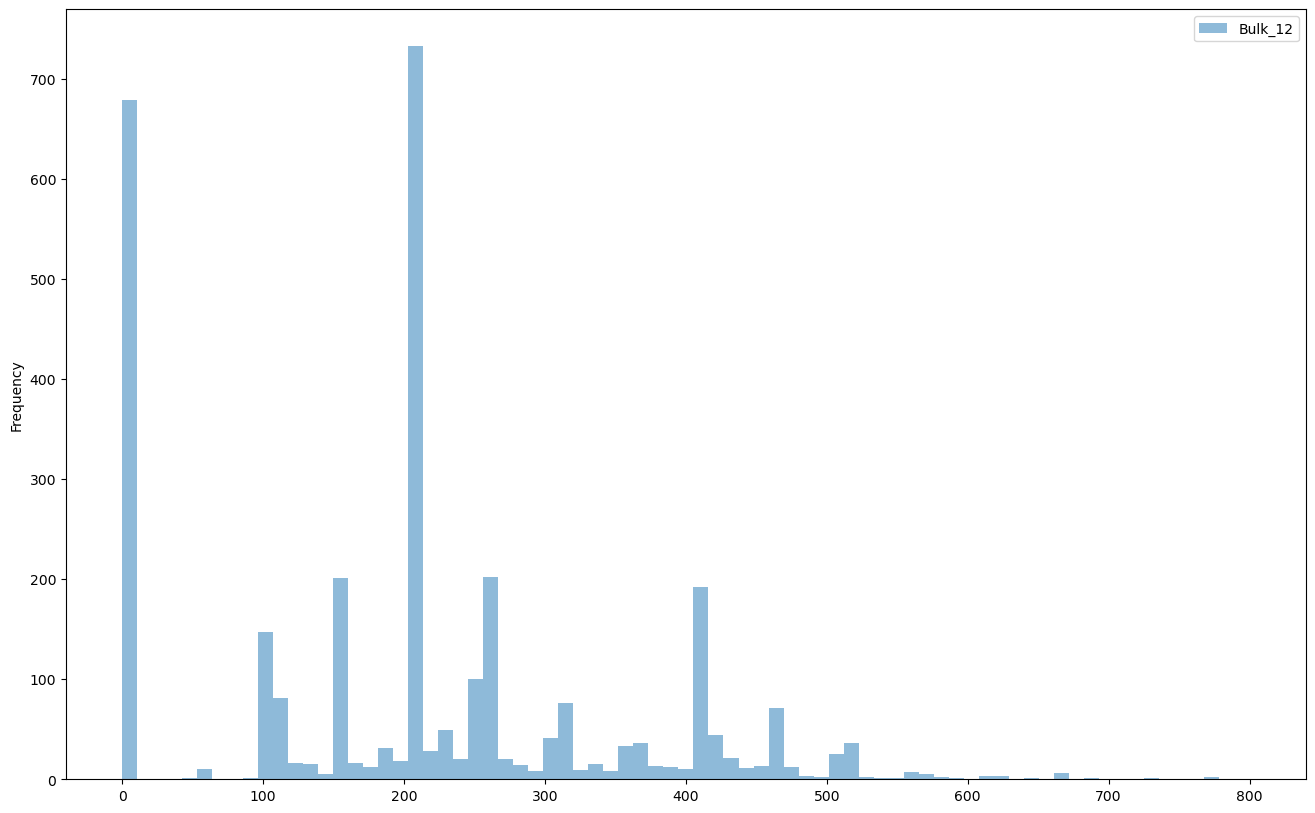

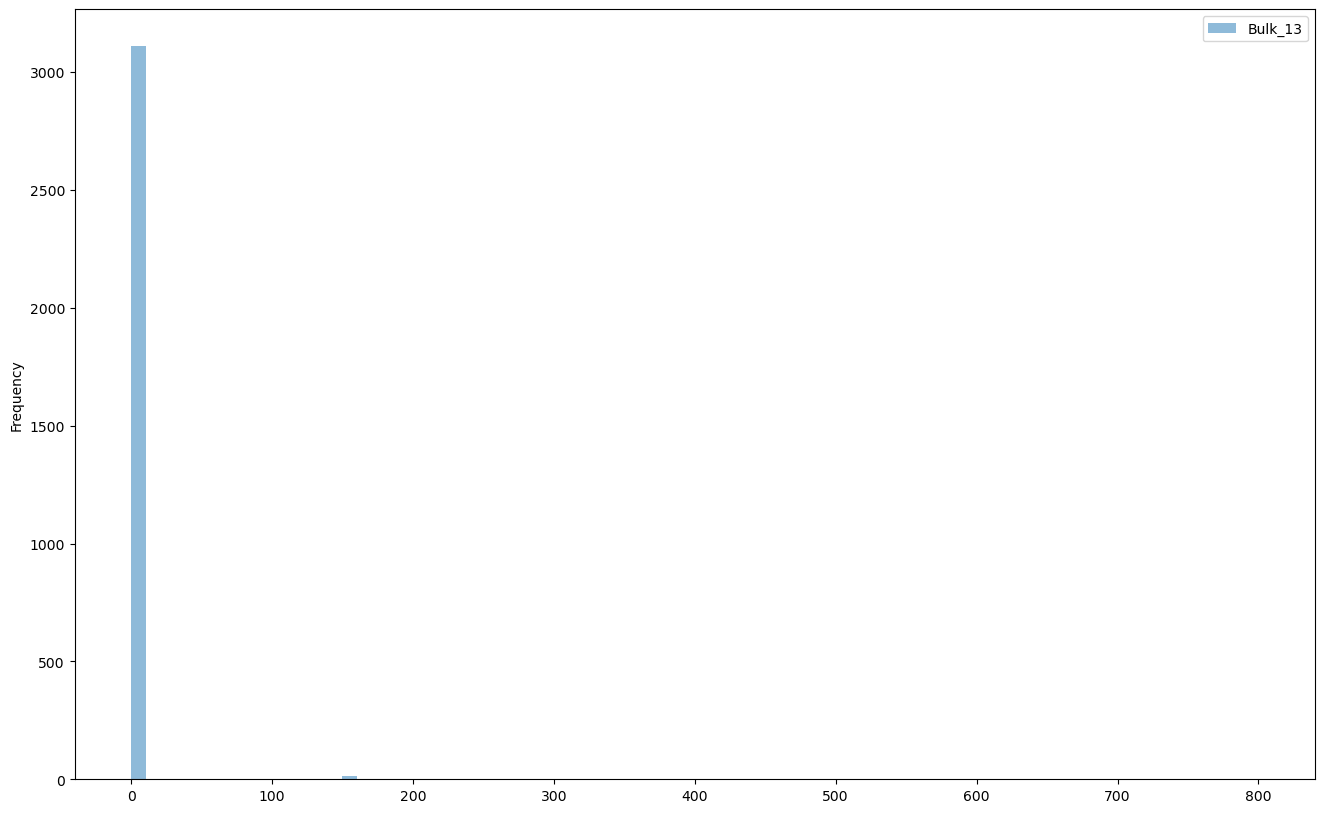

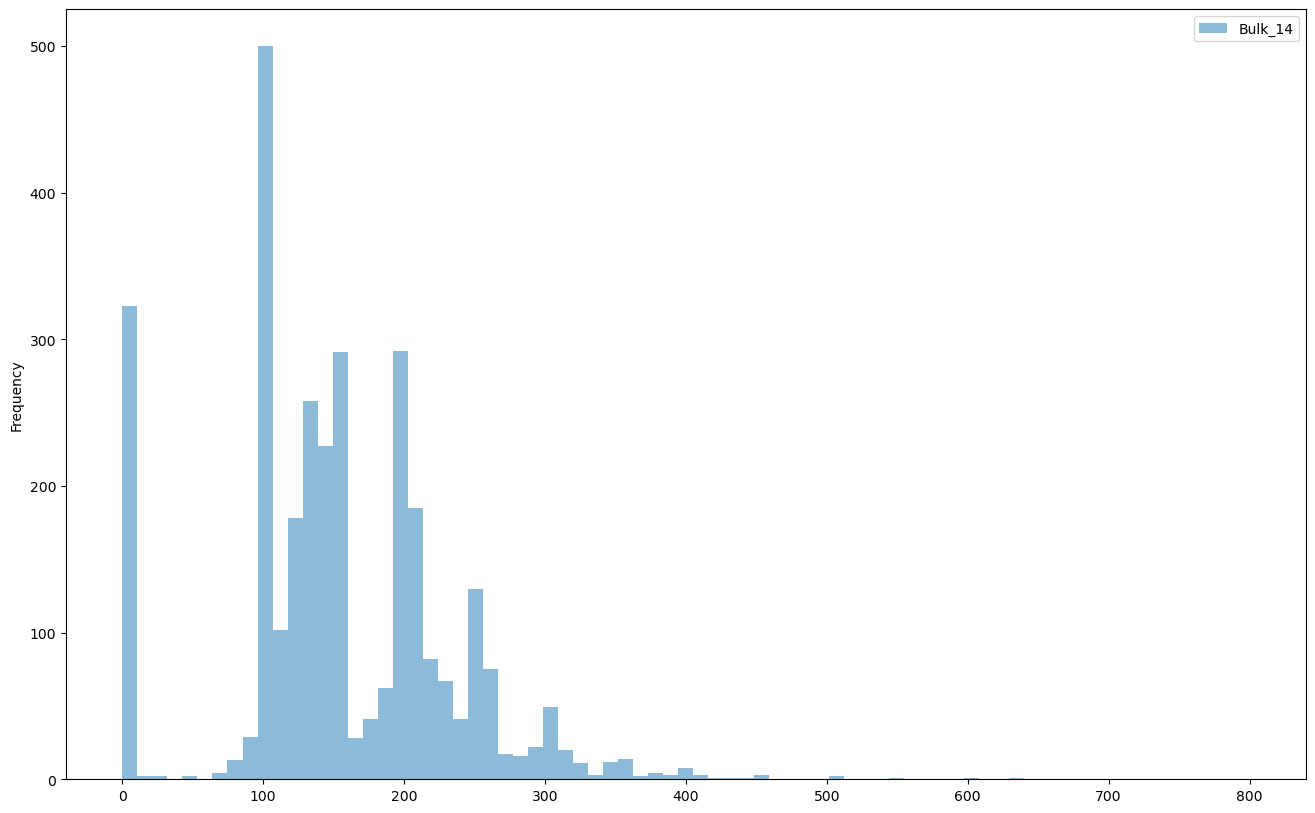

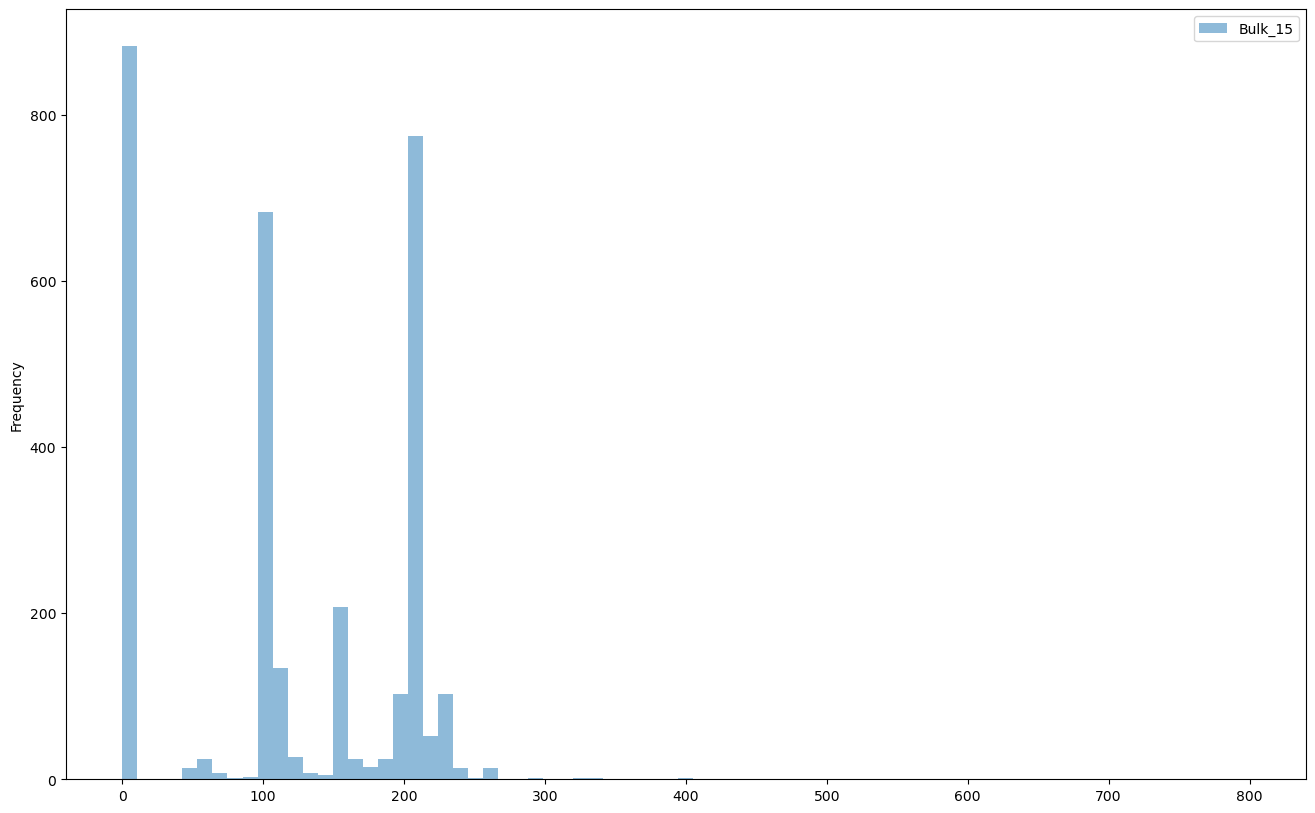

In [18]:
for name, values in data_bulk.iteritems ():
    if name!='key':
        data_bulk[name] = data_bulk[name].astype(int)
        data_bulk[name].plot(kind='hist', bins=75, alpha=0.5, figsize=(16,10) , range=(0,800))
        plt.legend(loc='upper right')  
        plt.show()


разнес по разным диаграмма, стало видней, что некотрых примесей вообще единицы=) 

# данные о подаче сыпучих материалов (время)

In [19]:
#data_bulk_time = pd.read_csv('/Users/Dom/datasets/data_bulk_time.csv')
data_bulk_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   key      3129 non-null   int64 
 1   Bulk 1   252 non-null    object
 2   Bulk 2   22 non-null     object
 3   Bulk 3   1298 non-null   object
 4   Bulk 4   1014 non-null   object
 5   Bulk 5   77 non-null     object
 6   Bulk 6   576 non-null    object
 7   Bulk 7   25 non-null     object
 8   Bulk 8   1 non-null      object
 9   Bulk 9   19 non-null     object
 10  Bulk 10  176 non-null    object
 11  Bulk 11  177 non-null    object
 12  Bulk 12  2450 non-null   object
 13  Bulk 13  18 non-null     object
 14  Bulk 14  2806 non-null   object
 15  Bulk 15  2248 non-null   object
dtypes: int64(1), object(15)
memory usage: 391.2+ KB


In [20]:
data_bulk_time
data_bulk_time.columns = ['key', 'Bulk_1', 'Bulk_2', 'Bulk_3', 'Bulk_4', 'Bulk_5', 'Bulk_6',
                          'Bulk_7', 'Bulk_8', 'Bulk_9', 'Bulk_10', 'Bulk_11', 'Bulk_12', 'Bulk_13', 'Bulk_14', 'Bulk_15']

In [21]:
data_bulk_time

,key,Bulk_1,Bulk_2,Bulk_3,Bulk_4,Bulk_5,Bulk_6,Bulk_7,Bulk_8,Bulk_9,Bulk_10,Bulk_11,Bulk_12,Bulk_13,Bulk_14,Bulk_15
0,1,NaN,NaN,NaN,2019-05-03 11:21:30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 11:03:52,NaN,2019-05-03 11:03:52,2019-05-03 11:03:52
1,2,NaN,NaN,NaN,2019-05-03 11:46:38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 11:40:20,NaN,2019-05-03 11:40:20,2019-05-03 11:40:20
2,3,NaN,NaN,NaN,2019-05-03 12:31:06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 12:09:40,NaN,2019-05-03 12:09:40,2019-05-03 12:09:40
3,4,NaN,NaN,NaN,2019-05-03 12:48:43,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 12:41:24,NaN,2019-05-03 12:41:24,2019-05-03 12:41:24
4,5,NaN,NaN,NaN,2019-05-03 13:18:50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 13:12:56,NaN,2019-05-03 13:12:56,2019-05-03 13:12:56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3124,3237,NaN,NaN,2019-08-31 22:51:28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-08-31 22:46:52,NaN,2019-08-31 22:46:52,2019-08-31 22:46:52
3125,3238,NaN,NaN,2019-08-31 23:39:11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-08-31 23:33:09,NaN,2019-08-31 23:33:09,2019-08-31 23:33:09
3126,3239,NaN,NaN,NaN,NaN,NaN,2019-09-01 01:51:58,NaN,NaN,NaN,NaN,NaN,2019-09-01 01:39:41,NaN,2019-09-01 01:33:25,2019-09-01 01:33:25
3127,3240,NaN,NaN,NaN,NaN,NaN,2019-09-01 03:12:40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-09-01 02:41:27,2019-09-01 02:41:27


тут пока оставим пропуски, возможно в дальнейшем заменим на 0.
Переводим только время в дататайм

In [22]:
for name, values in data_bulk_time.iteritems():
    if name != 'key':
        data_bulk_time[name] = pd.to_datetime(data_bulk_time[name])

# данные о продувке сплава газом

In [23]:
#data_gas = pd.read_csv('/Users/Dom/datasets/data_gas.csv')
data_gas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3239 entries, 0 to 3238
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   key     3239 non-null   int64  
 1   Газ 1   3239 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 50.7 KB


In [24]:
data_gas.columns = ['key', 'Gaz']

In [25]:
data_gas.describe()

,key,Gaz
count,3239.000000,3239.000000
mean,1621.861377,11.002062
std,935.386334,6.220327
min,1.000000,0.008399
25%,812.500000,7.043089
50%,1622.000000,9.836267
75%,2431.500000,13.769915
max,3241.000000,77.995040


<AxesSubplot:xlabel='Gaz', ylabel='Density'>

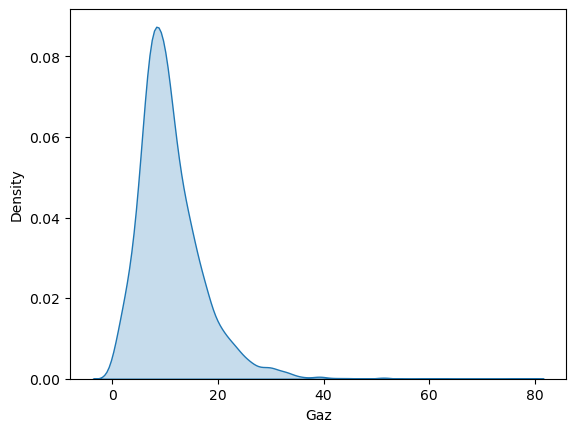

In [26]:
sns.kdeplot(data=data_gas['Gaz'], shade=True)

На мой взгляд есть выбросы, но не критичны.

#  результаты измерения температуры

In [27]:
#data_temp = pd.read_csv('/Users/Dom/datasets/data_temp.csv')
data_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15907 entries, 0 to 15906
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   key           15907 non-null  int64  
 1   Время замера  15907 non-null  object 
 2   Температура   13006 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 372.9+ KB


ренеймним, без пробелов. и переведём  время замеров в дататайм

In [28]:
data_temp.describe()

,key,Температура
count,15907.000000,13006.000000
mean,1607.880870,1591.840920
std,942.212073,21.375851
min,1.000000,1191.000000
25%,790.000000,1581.000000
50%,1618.000000,1591.000000
75%,2427.000000,1601.000000
max,3241.000000,1705.000000


In [29]:
data_temp.columns = ['key', 'Time_take', 'Temp']

In [30]:
data_temp.describe()

,key,Temp
count,15907.000000,13006.000000
mean,1607.880870,1591.840920
std,942.212073,21.375851
min,1.000000,1191.000000
25%,790.000000,1581.000000
50%,1618.000000,1591.000000
75%,2427.000000,1601.000000
max,3241.000000,1705.000000


In [31]:
uniq = data_temp.duplicated()
uniq.unique()

array([False])

In [32]:
data_temp['Time_take'] = pd.to_datetime(data_temp['Time_take'])

<AxesSubplot:xlabel='Temp', ylabel='Density'>

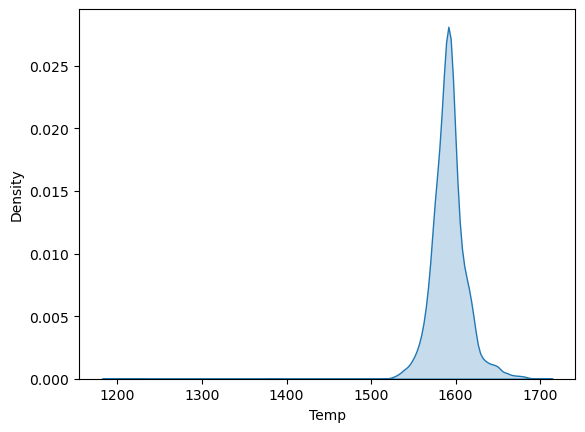

In [33]:
sns.kdeplot(data=data_temp['Temp'], shade=True)

Тут удалим если есть пропуски в нашем таргете 

In [34]:
data_temp.dropna(inplace=True)

Тут всё впорядке выборосв нету

# данные о проволочных материалах (объём)

In [35]:
#data_wire =  pd.read_csv('/Users/Dom/datasets/data_wire.csv')
data_wire.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3081 entries, 0 to 3080
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   key     3081 non-null   int64  
 1   Wire 1  3055 non-null   float64
 2   Wire 2  1079 non-null   float64
 3   Wire 3  63 non-null     float64
 4   Wire 4  14 non-null     float64
 5   Wire 5  1 non-null      float64
 6   Wire 6  73 non-null     float64
 7   Wire 7  11 non-null     float64
 8   Wire 8  19 non-null     float64
 9   Wire 9  29 non-null     float64
dtypes: float64(9), int64(1)
memory usage: 240.8 KB


In [36]:
data_wire

,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
0,1,60.059998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,96.052315,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,91.160157,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,89.063515,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,89.238236,9.11456,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
3076,3237,38.088959,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3077,3238,56.128799,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3078,3239,143.357761,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3079,3240,34.070400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
data_wire.columns = ['key', 'Wire1', 'Wire2', 'Wire3',
                     'Wire4', 'Wire5', 'Wire6', 'Wire7', 'Wire8', 'Wire9']

In [38]:
data_wire = data_wire.fillna(0)

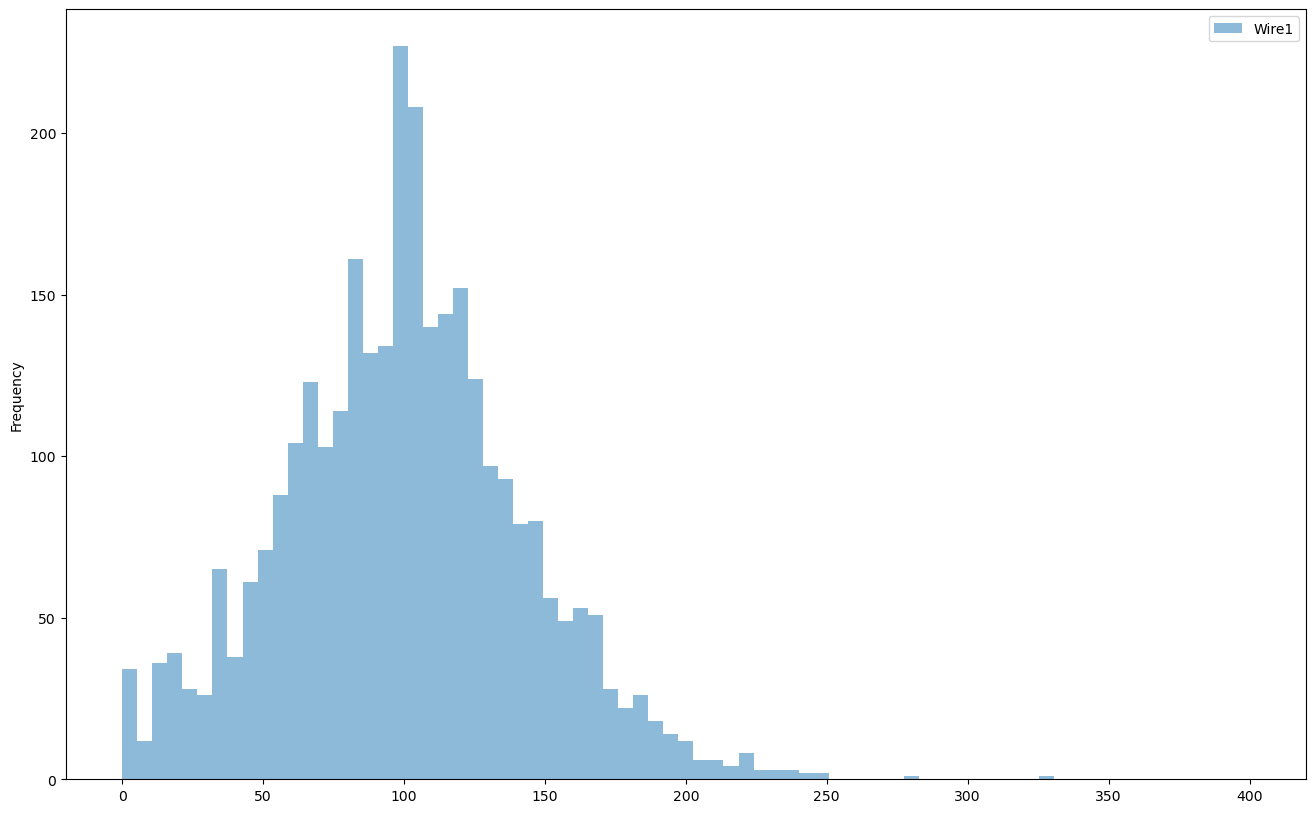

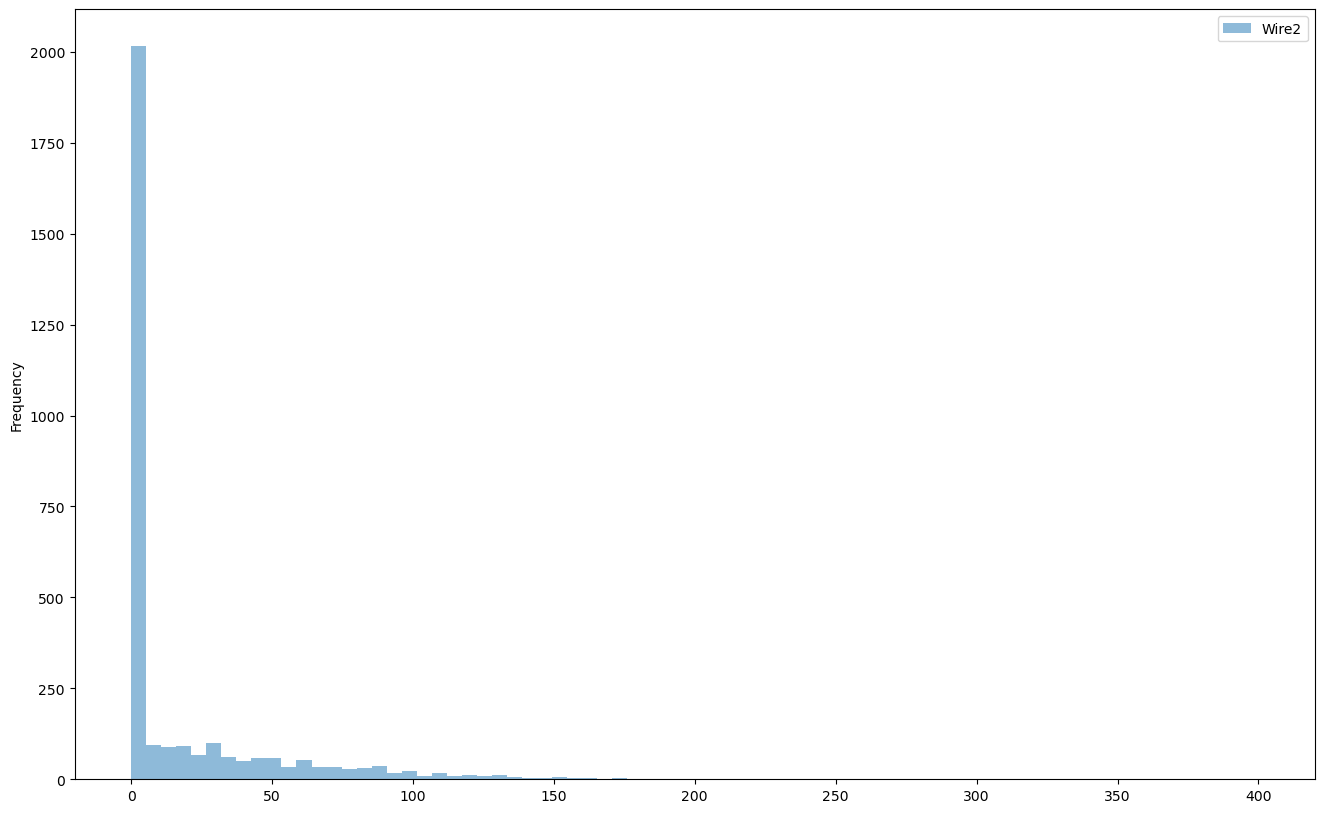

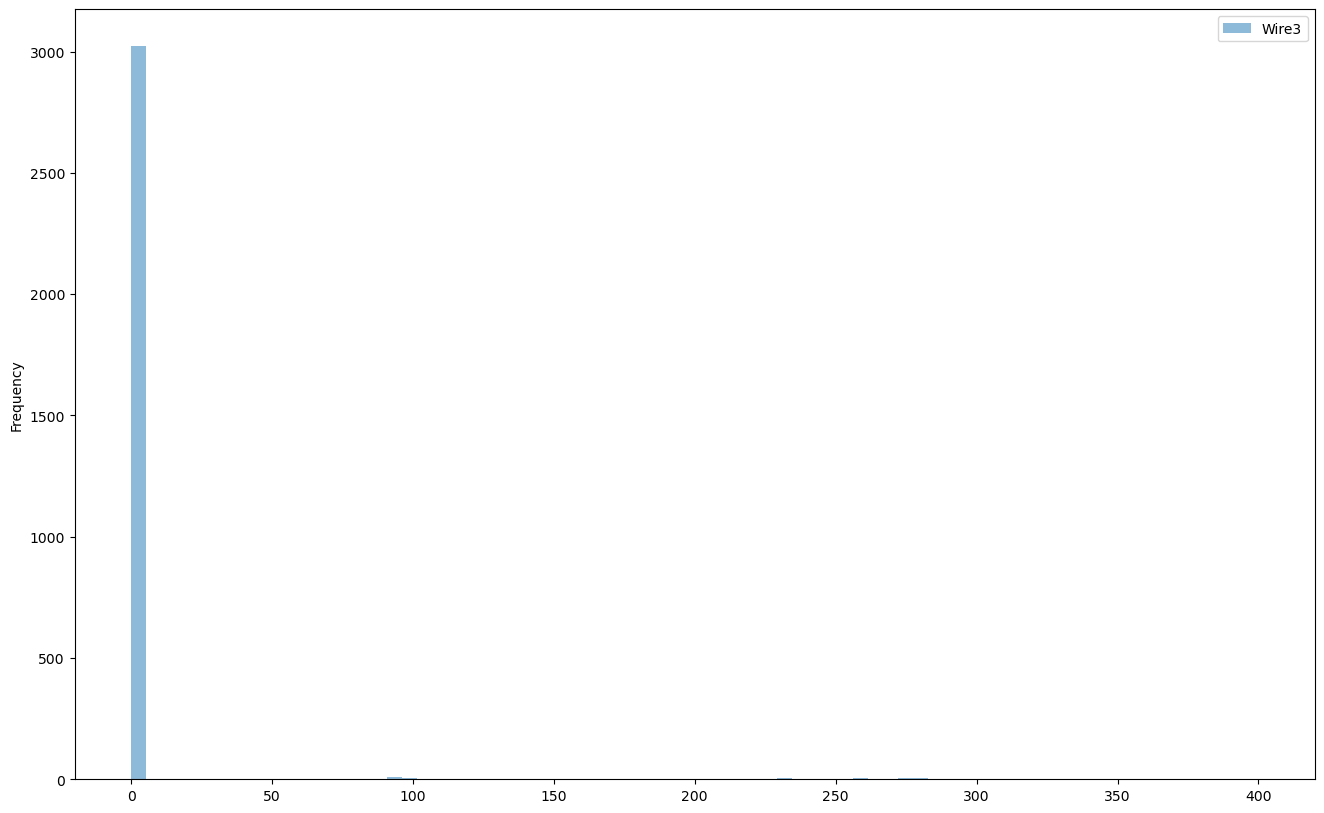

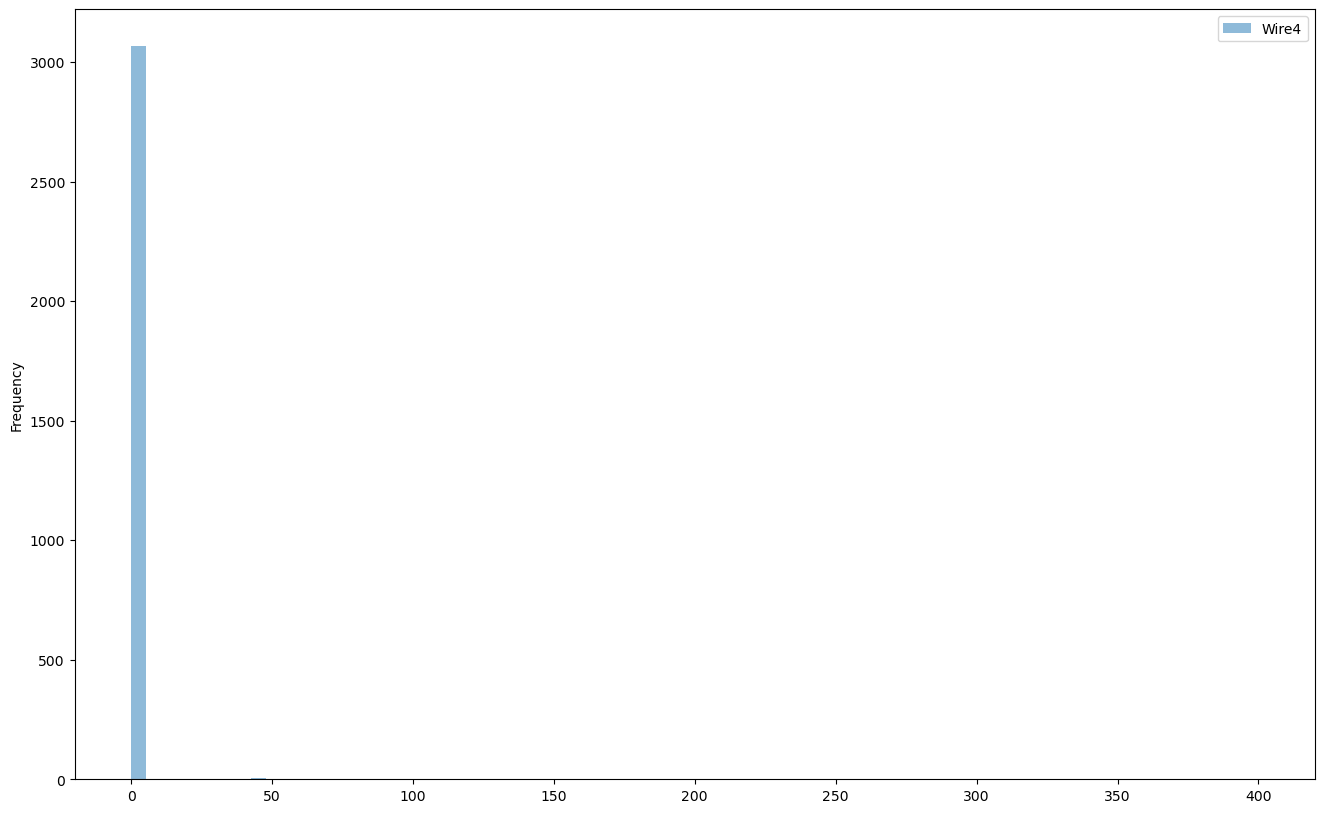

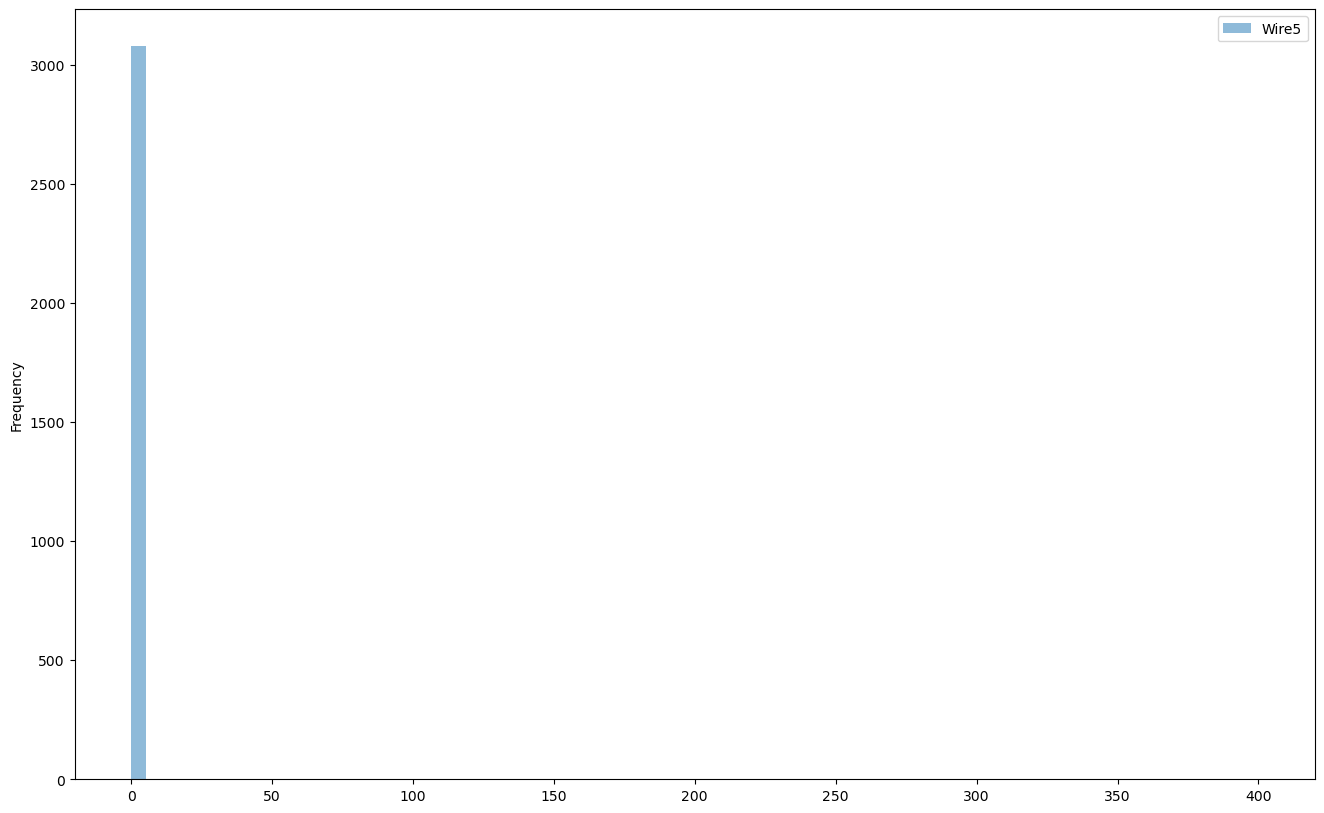

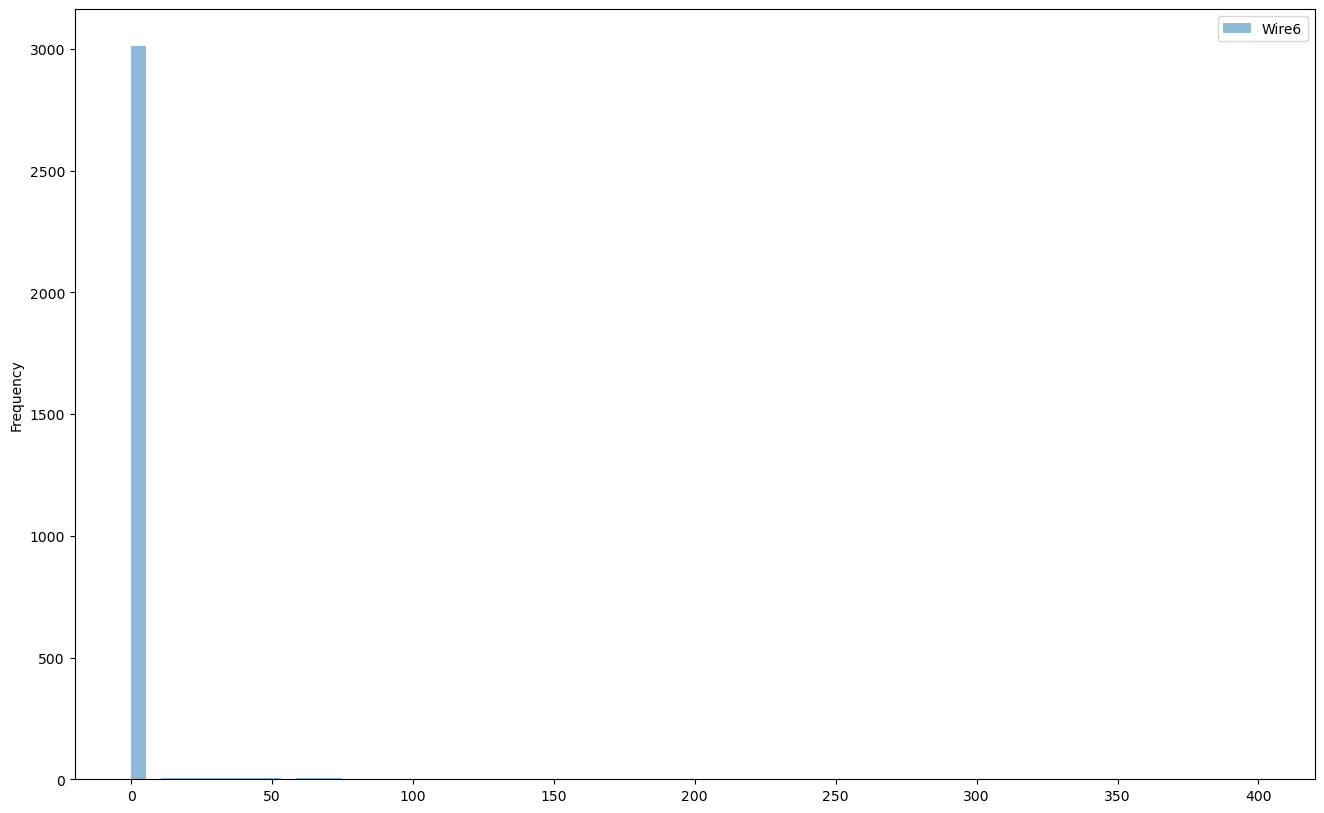

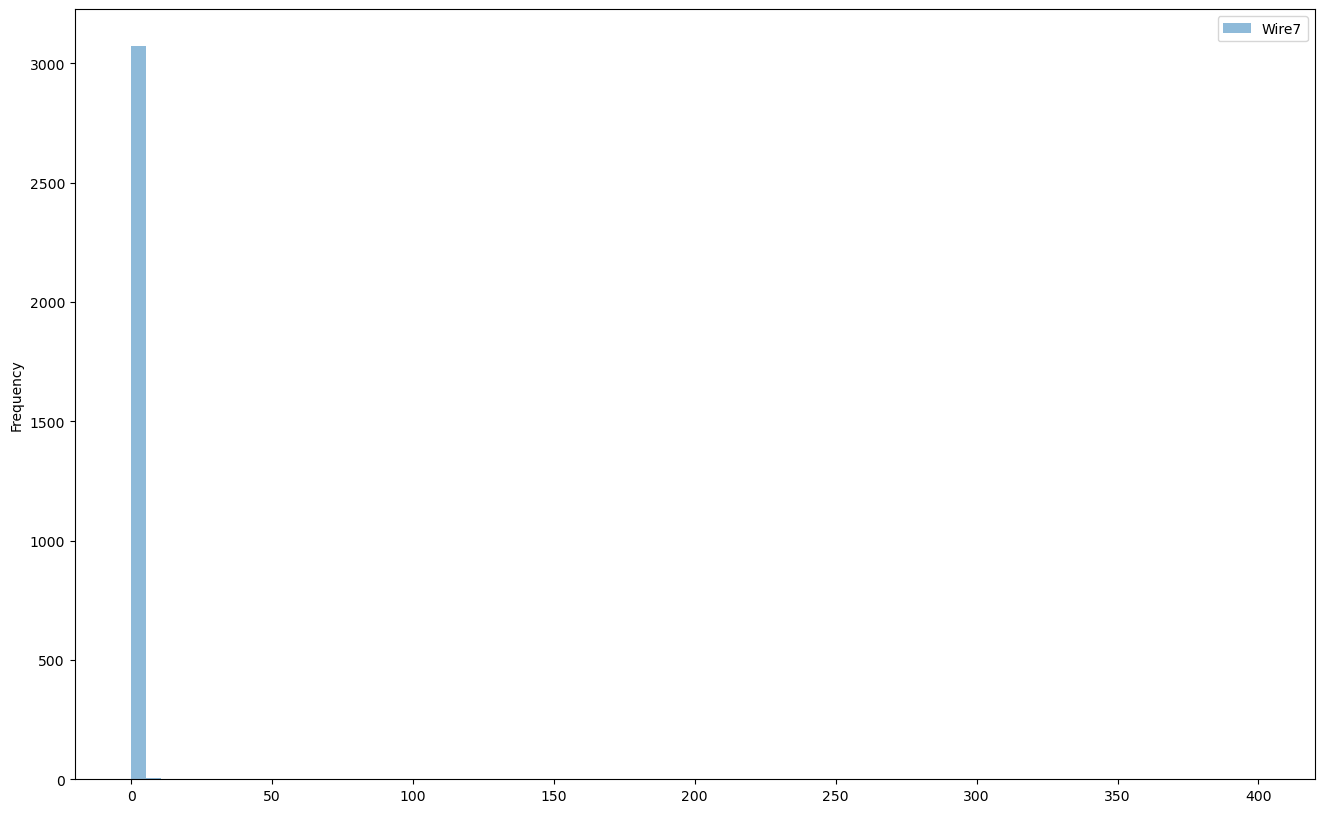

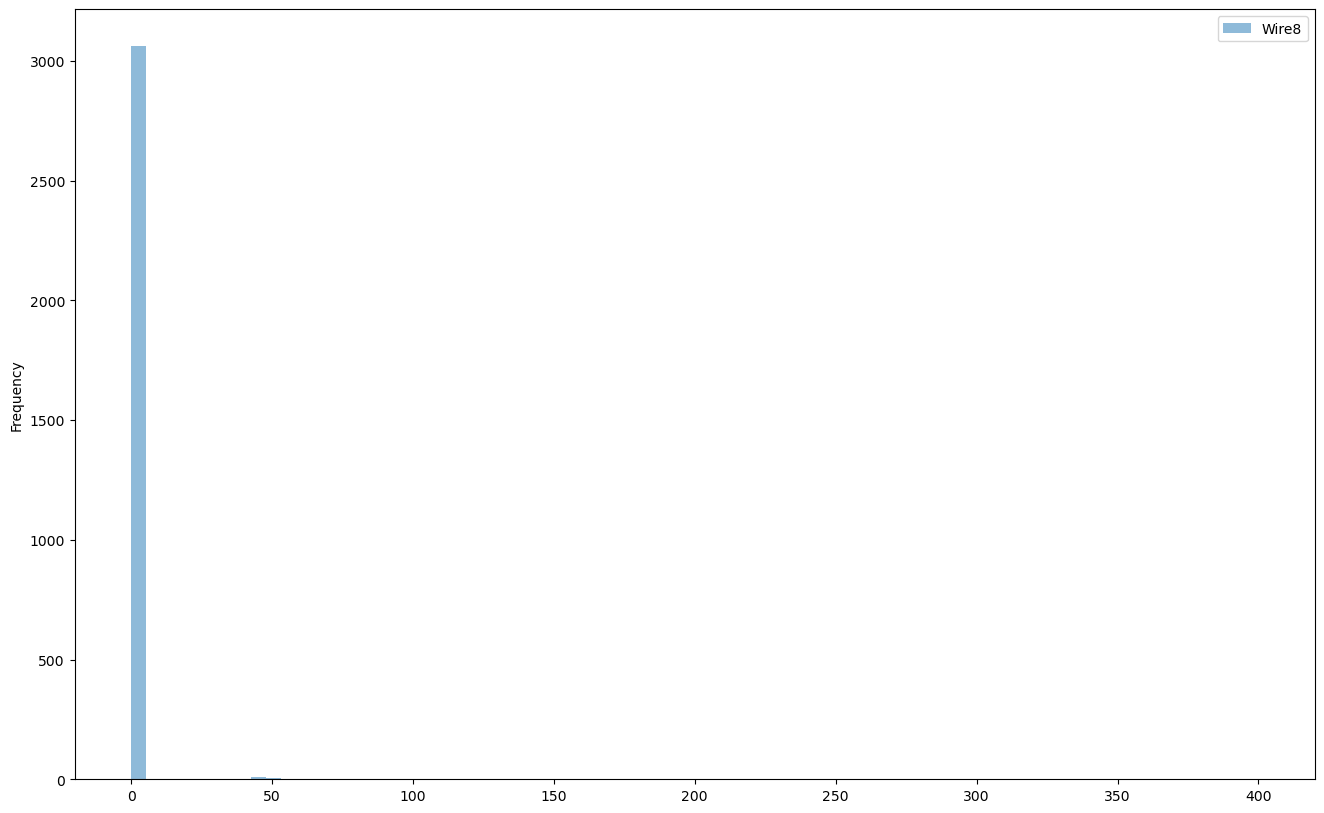

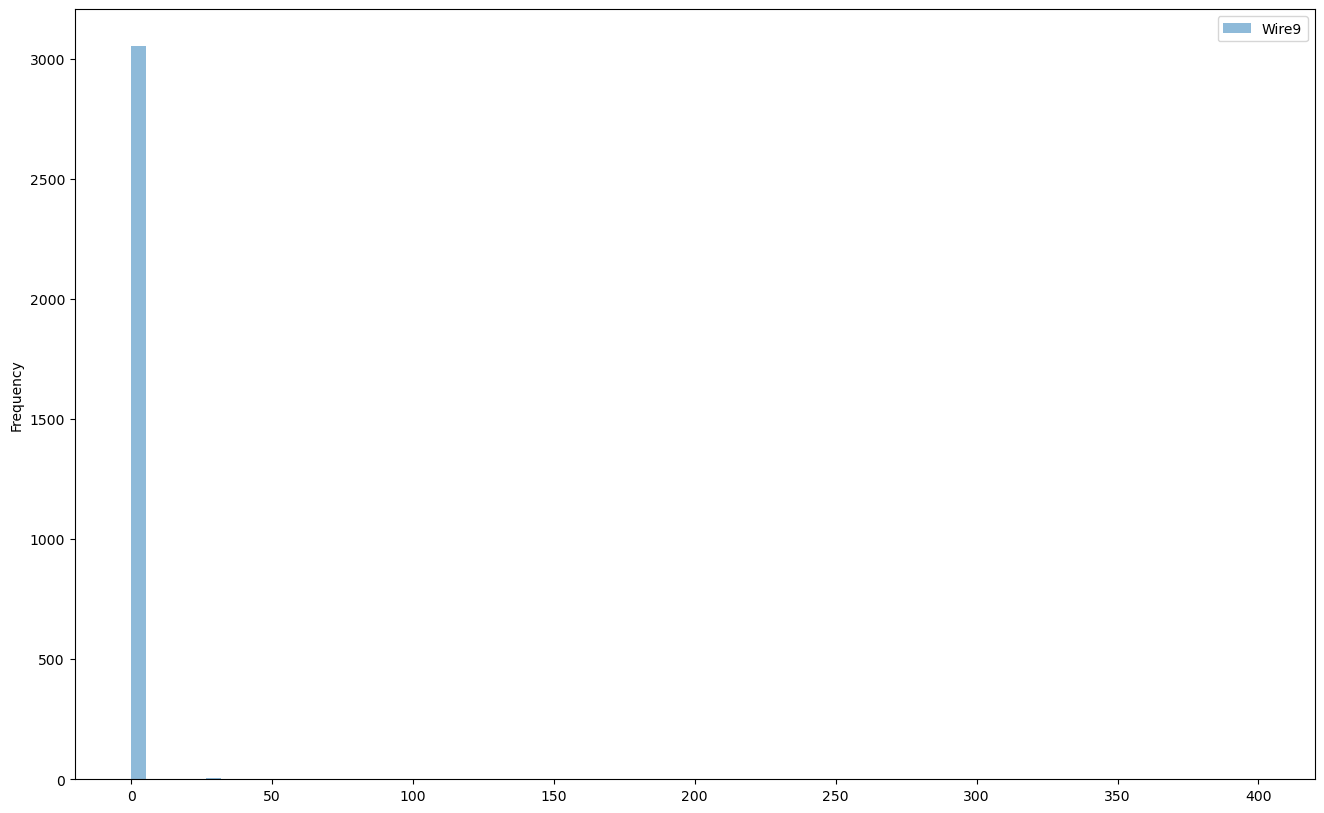

In [39]:
for name, values in data_wire.iteritems():
    if name != 'key':
        data_wire[name].plot(kind='hist', bins=75, alpha=0.5,
                             figsize=(16, 10), range=(0, 400))
        plt.legend(loc='upper right')
        plt.show()

в некоторых случая либо отсутсвует либо единицы

# данные о проволочных материалах (время)

In [40]:
#data_wire_time = pd.read_csv('/Users/Dom/datasets/data_wire_time.csv')
data_wire_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3081 entries, 0 to 3080
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   key     3081 non-null   int64 
 1   Wire 1  3055 non-null   object
 2   Wire 2  1079 non-null   object
 3   Wire 3  63 non-null     object
 4   Wire 4  14 non-null     object
 5   Wire 5  1 non-null      object
 6   Wire 6  73 non-null     object
 7   Wire 7  11 non-null     object
 8   Wire 8  19 non-null     object
 9   Wire 9  29 non-null     object
dtypes: int64(1), object(9)
memory usage: 240.8+ KB


In [41]:
data_wire_time

,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
0,1,2019-05-03 11:11:41,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,2019-05-03 11:46:10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,2019-05-03 12:13:47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,2019-05-03 12:48:05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,2019-05-03 13:18:15,2019-05-03 13:32:06,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
3076,3237,2019-08-31 22:50:20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3077,3238,2019-08-31 23:38:24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3078,3239,2019-09-01 01:50:43,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3079,3240,2019-09-01 03:12:02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
for name, values in data_wire_time.iteritems():
    if name != 'key':
        data_wire_time[name] = pd.to_datetime(data_wire_time[name])

## выводы
* Перевели данные по датам и вермени к формату дататайм
* Превели наименование колонок к стандатному виду
* Много пропусков в таблицах, где происходит обработка и добавления материалов, возможно из - за того что и не добавляли вовсе.

 Данные:
- на диаграммах хорошо видно, что в присадках много пропущенных данных, но пока удалять не будем
- на диаграммах хорошо видно, что в проволоках много пропущенных данных, но пока удалять не будем
- В случае с температурой плавления: по справочнику она у металла = около 1400+-, т.е. 1200 - действиетльно кажется очень странным значением. А 1450 и выше выглядит вполне рабочим, не смотря на статистические границы.

In [43]:
data_temp = data_temp.loc[data_temp['Temp'] >= 1200]

# Подготовка данных и слияние в одну таблицу

In [44]:
data_arc

,key,Start_heat,End_heat,Act_power,React_power
0,1,2019-05-03 11:02:14,2019-05-03 11:06:02,0.976059,0.687084
1,1,2019-05-03 11:07:28,2019-05-03 11:10:33,0.805607,0.520285
2,1,2019-05-03 11:11:44,2019-05-03 11:14:36,0.744363,0.498805
3,1,2019-05-03 11:18:14,2019-05-03 11:24:19,1.659363,1.062669
4,1,2019-05-03 11:26:09,2019-05-03 11:28:37,0.692755,0.414397
...,...,...,...,...,...
14871,3241,2019-09-01 03:58:58,2019-09-01 04:01:35,0.533670,0.354439
14872,3241,2019-09-01 04:05:04,2019-09-01 04:08:04,0.676604,0.523631
14873,3241,2019-09-01 04:16:41,2019-09-01 04:19:45,0.733899,0.475654
14874,3241,2019-09-01 04:31:51,2019-09-01 04:32:48,0.220694,0.145768


In [45]:
data_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13005 entries, 0 to 15902
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   key        13005 non-null  int64         
 1   Time_take  13005 non-null  datetime64[ns]
 2   Temp       13005 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 406.4 KB


In [46]:
data_temp.head(50)

,key,Time_take,Temp
0,1,2019-05-03 11:16:18,1571.0
1,1,2019-05-03 11:25:53,1604.0
2,1,2019-05-03 11:29:11,1618.0
3,1,2019-05-03 11:30:01,1601.0
4,1,2019-05-03 11:30:39,1613.0
5,2,2019-05-03 11:37:27,1581.0
6,2,2019-05-03 11:38:00,1577.0
7,2,2019-05-03 11:49:38,1589.0
8,2,2019-05-03 11:55:50,1604.0
9,2,2019-05-03 11:58:24,1608.0


In [47]:
data_temp['key'].value_counts() > 1
data = data_temp['key'].value_counts() > 1
data = data[data] == True
ok_keys = []
ok_keys = data.index
data_temp = data_temp.query('key  in @ok_keys')

In [48]:
data_1 = data_temp.groupby(['key'], axis=0, as_index=False).first()
data_2 = data_temp.groupby(['key'], axis=0, as_index=False).last()

обьединим через иннер, ибо если 1 есть а другого нету, он нам не нужен. 

In [49]:
data_3 = pd.merge(data_1, data_2, how='inner', on='key')

In [50]:
data_3

,key,Time_take_x,Temp_x,Time_take_y,Temp_y
0,1,2019-05-03 11:16:18,1571.0,2019-05-03 11:30:39,1613.0
1,2,2019-05-03 11:37:27,1581.0,2019-05-03 11:59:12,1602.0
2,3,2019-05-03 12:13:17,1596.0,2019-05-03 12:34:57,1599.0
3,4,2019-05-03 12:52:57,1601.0,2019-05-03 12:59:25,1625.0
4,5,2019-05-03 13:23:19,1576.0,2019-05-03 13:36:01,1602.0
...,...,...,...,...,...
2470,2495,2019-08-06 00:35:45,1570.0,2019-08-06 00:54:42,1591.0
2471,2496,2019-08-06 01:02:54,1554.0,2019-08-06 01:29:52,1591.0
2472,2497,2019-08-06 01:41:53,1571.0,2019-08-06 01:53:50,1589.0
2473,2498,2019-08-06 02:03:49,1591.0,2019-08-06 02:25:31,1594.0


Обратил внимание, что есть одинаковые, ну возможно было одно значение. исправим выше

In [51]:
#data_temp['key'].value_counts()>1
#data= data_temp['key'].value_counts()>1
#data=data[data]==True
#ok_keys = []
#ok_keys = data.index
#data_temp = data_temp.query('key  in @ok_keys')

приклеим проволоку

In [52]:
data_4 = data_3.merge(data_wire, on='key', how='inner')

Продолжаем собирать нашу итоговую таблицу

тут тоже иннер, ибо я думаю это один из основных показателей, и если по нему данных нет, то будет хуже поставив туда 0

In [53]:
data_arc_1 = data_arc.groupby(['key'], axis=0, as_index=False).sum()

In [54]:
data_data_ = data_4.merge(data_arc_1, on='key', how='inner')

In [55]:
data_data_

,key,Time_take_x,Temp_x,Time_take_y,Temp_y,Wire1,Wire2,Wire3,Wire4,Wire5,Wire6,Wire7,Wire8,Wire9,Act_power,React_power
0,1,2019-05-03 11:16:18,1571.0,2019-05-03 11:30:39,1613.0,60.059998,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.878147,3.183241
1,2,2019-05-03 11:37:27,1581.0,2019-05-03 11:59:12,1602.0,96.052315,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.052598,1.998112
2,3,2019-05-03 12:13:17,1596.0,2019-05-03 12:34:57,1599.0,91.160157,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.525882,1.599076
3,4,2019-05-03 12:52:57,1601.0,2019-05-03 12:59:25,1625.0,89.063515,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.209250,2.060298
4,5,2019-05-03 13:23:19,1576.0,2019-05-03 13:36:01,1602.0,89.238236,9.11456,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.347173,2.252643
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2367,2495,2019-08-06 00:35:45,1570.0,2019-08-06 00:54:42,1591.0,89.150879,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.210690,2.360777
2368,2496,2019-08-06 01:02:54,1554.0,2019-08-06 01:29:52,1591.0,114.179527,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.203064,2.810185
2369,2497,2019-08-06 01:41:53,1571.0,2019-08-06 01:53:50,1589.0,94.086723,9.04800,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.212379,1.851269
2370,2498,2019-08-06 02:03:49,1591.0,2019-08-06 02:25:31,1594.0,118.110717,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.408725,2.355428


In [56]:
data_data_2 = data_data_.merge(data_bulk, on='key', how='inner')

In [57]:
data_data_3 = data_data_2.merge(data_gas, on='key', how='inner')

In [58]:
data_data_3.describe()

,key,Temp_x,Temp_y,Wire1,Wire2,Wire3,Wire4,Wire5,Wire6,Wire7,...,Bulk_7,Bulk_8,Bulk_9,Bulk_10,Bulk_11,Bulk_12,Bulk_13,Bulk_14,Bulk_15,Gaz
count,2329.000000,2329.000000,2329.000000,2329.000000,2329.000000,2329.000000,2329.000000,2329.0,2329.000000,2329.000000,...,2329.000000,2329.000000,2329.000000,2329.000000,2329.000000,2329.000000,2329.000000,2329.000000,2329.000000,2329.000000
mean,1251.832546,1586.883641,1593.365393,102.443601,17.609859,3.234916,0.306550,0.0,0.978820,0.006361,...,2.004723,0.021039,0.444826,5.052812,4.245170,208.415629,1.067411,153.853585,119.952769,11.375600
std,714.762400,27.076475,11.200915,43.539993,33.624771,27.942871,4.757746,0.0,8.693299,0.205705,...,30.676234,1.015340,6.220641,20.917800,22.515487,157.062272,14.235055,81.404354,84.640443,6.392041
min,1.000000,1208.000000,1541.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.008399
25%,630.000000,1571.000000,1587.000000,73.207679,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,105.000000,0.000000,105.000000,0.000000,7.282948
50%,1255.000000,1587.000000,1593.000000,101.119201,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,0.000000,149.000000,107.000000,10.100950
75%,1868.000000,1603.000000,1598.000000,128.091599,23.102560,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,282.000000,0.000000,204.000000,204.000000,14.216688
max,2499.000000,1660.000000,1653.000000,330.314424,282.780152,385.008668,113.231044,0.0,180.454575,8.490040,...,772.000000,49.000000,147.000000,159.000000,313.000000,1849.000000,305.000000,636.000000,405.000000,77.995040


Проговорили , что время не нужно. удалим

In [59]:
data_data_3 = data_data_3.drop('Time_take_x', axis=1)
data_data_3 = data_data_3.drop('Time_take_y', axis=1)

и переименуем колонки

In [60]:
data_data_3.rename(columns={'Temp_x': 'Start_temp',
                   'Temp_y': 'End_temp'}, inplace=True)

Таблица готова

## Выводы:
    1.  Взяли по сути только итоговую температуру, ибо это наша цель. ОСтальные убрали.
    2.  Присоеденили данных от других таблиц, где-то иннером, где-то лефт. Потому, что в некоторых случае нам обязательно нужны эти данные , и без них теряется актуальность нашей таблицы.  А в иных случаях, я думаю может и не повялиять на итогвый результат, т.к. ну не добавили примеси, вот и нет данных или ещё как то.
    Далее хотелось бы понять, есть ли зависимость данных.

Посмотрим на таблицу:

In [61]:
data_data_3

,key,Start_temp,End_temp,Wire1,Wire2,Wire3,Wire4,Wire5,Wire6,Wire7,...,Bulk_7,Bulk_8,Bulk_9,Bulk_10,Bulk_11,Bulk_12,Bulk_13,Bulk_14,Bulk_15,Gaz
0,1,1571.0,1613.0,60.059998,0.00000,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,206,0,150,154,29.749986
1,2,1581.0,1602.0,96.052315,0.00000,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,206,0,149,154,12.555561
2,3,1596.0,1599.0,91.160157,0.00000,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,205,0,152,153,28.554793
3,4,1601.0,1625.0,89.063515,0.00000,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,207,0,153,154,18.841219
4,5,1576.0,1602.0,89.238236,9.11456,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,203,0,151,152,5.413692
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2324,2495,1570.0,1591.0,89.150879,0.00000,0.0,0.0,0.0,0.0,0.0,...,0,0,0,90,0,256,0,129,223,7.125735
2325,2496,1554.0,1591.0,114.179527,0.00000,0.0,0.0,0.0,0.0,0.0,...,0,0,0,122,0,256,0,129,226,9.412616
2326,2497,1571.0,1589.0,94.086723,9.04800,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,230,0,124,226,6.271699
2327,2498,1591.0,1594.0,118.110717,0.00000,0.0,0.0,0.0,0.0,0.0,...,0,0,0,101,0,206,0,129,207,14.953657


Посмтроим график корреляции зависимостей

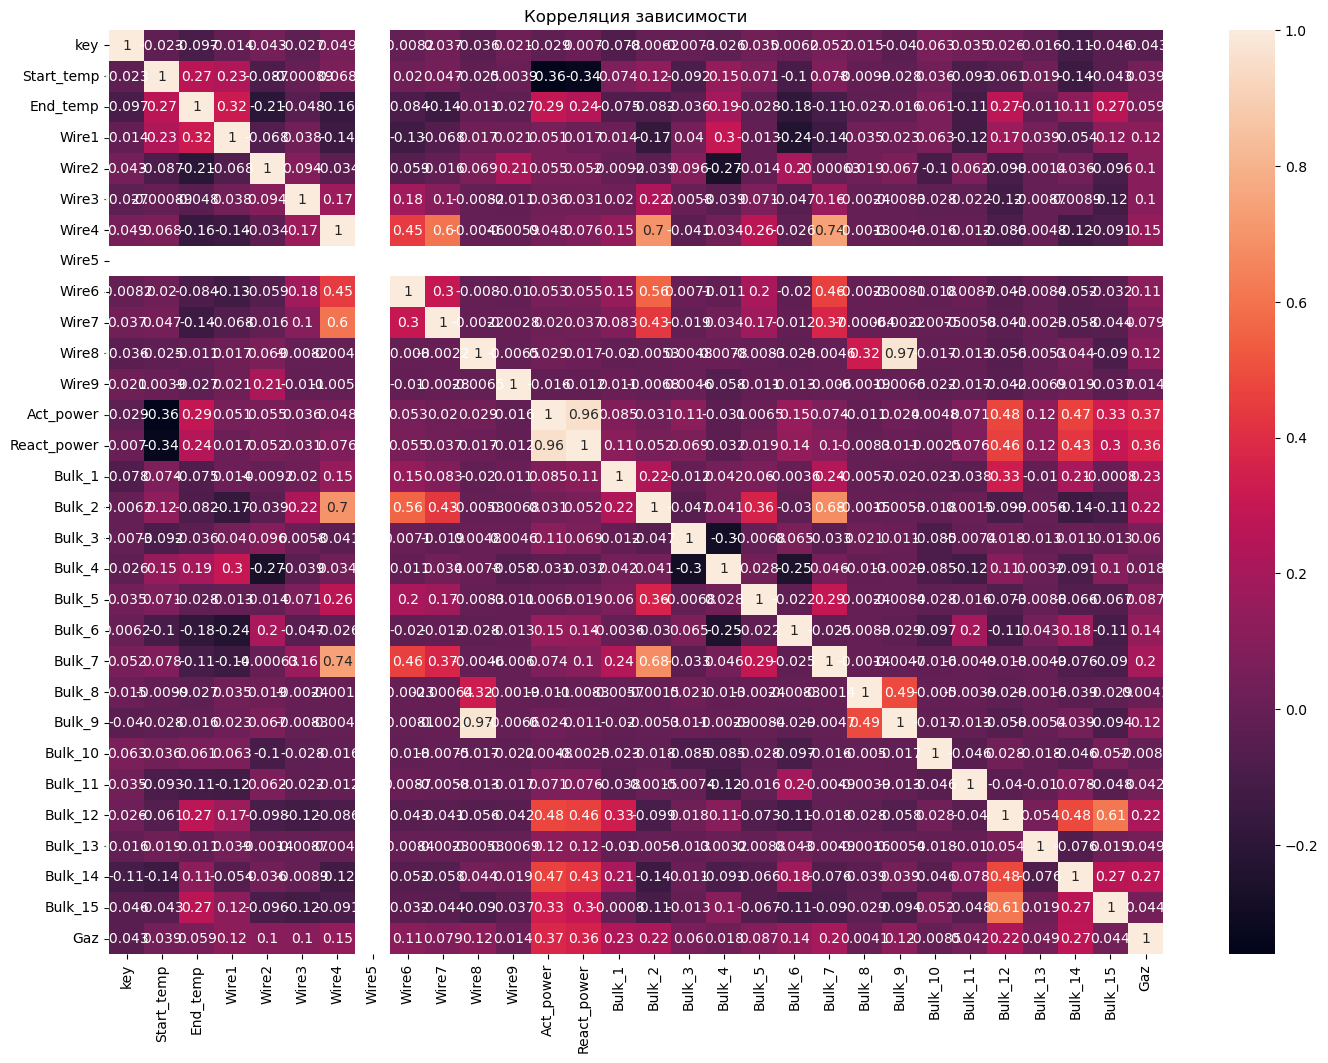

In [62]:
plt.figure(figsize=(17, 12))
plt.title('Корреляция зависимости')
sns.heatmap(data_data_3.corr(), annot=True)
plt.show()

Вывод:
1. Из матрицы корреляции видим, что Act_power и React_power сильно зависимы.
2. wire_5 примеси можно удалить, они вообще пустые.
3. Wire9 и Wire8 коррелируют удалим одну.

In [63]:
data_data_3 = data_data_3.drop('Wire5', axis=1)
data_data_3 = data_data_3.drop('Wire9', axis=1)
data_data_3 = data_data_3.drop('Act_power', axis=1)

In [64]:
data_data_3 = data_data_3.fillna(0)

выделяем наш таргет, данные перемешаем предварительно

In [65]:
data = shuffle(data_data_3, random_state=100423)

In [66]:
features = data.drop(['key', 'End_temp'], axis=1)
target = data['End_temp']

разбиваем наши выборки

In [67]:
features_train, features_test, target_train, target_test = train_test_split(
    features, target, test_size=0.25, random_state=100423)

# Обучение моделей

1 . начнем с линейной регресии

In [68]:
lr = LinearRegression()
lr.fit(features_train, target_train)

LinearRegression()

Для начала для наших моделей подберём оптимальные параметры, после проведём кросс валидацию и уже по результатам нашей метрики, выберем наилучшую модель, её и на тестовой выборке проверим.

катбуст

In [69]:
catboost = CatBoostRegressor(loss_function='MAE', random_state=100423)
parameters_cat = {'depth': [3, 6, 9],
                  'iterations': [100, 200, 1000]}
catboost_grid = catboost.grid_search(parameters_cat,
                                     Pool(features_train, target_train),
                                     cv=3,
                                     plot=False)

0:	learn: 1545.5997422	test: 1546.0851429	best: 1546.0851429 (0)	total: 150ms	remaining: 14.8s
1:	learn: 1499.2755025	test: 1499.7615741	best: 1499.7615741 (1)	total: 152ms	remaining: 7.43s
2:	learn: 1454.3277685	test: 1454.8144453	best: 1454.8144453 (2)	total: 153ms	remaining: 4.93s
3:	learn: 1410.7339602	test: 1411.2186683	best: 1411.2186683 (3)	total: 154ms	remaining: 3.69s
4:	learn: 1368.4317107	test: 1369.2762666	best: 1369.2762666 (4)	total: 155ms	remaining: 2.94s
5:	learn: 1327.4100348	test: 1328.2588922	best: 1328.2588922 (5)	total: 156ms	remaining: 2.44s
6:	learn: 1287.6211519	test: 1288.4680321	best: 1288.4680321 (6)	total: 157ms	remaining: 2.08s
7:	learn: 1249.0349836	test: 1249.8814646	best: 1249.8814646 (7)	total: 157ms	remaining: 1.81s
8:	learn: 1211.6039340	test: 1212.6676298	best: 1212.6676298 (8)	total: 158ms	remaining: 1.6s
9:	learn: 1175.2824202	test: 1176.3449793	best: 1176.3449793 (9)	total: 159ms	remaining: 1.43s
10:	learn: 1140.0723994	test: 1141.1334323	best: 11

In [70]:
catboost_grid['params']

{'depth': 3, 'iterations': 1000}

In [71]:
df = pd.DataFrame(catboost_grid['cv_results'])
print('мин катбуста MAE = ', df['test-MAE-mean'].min())

мин катбуста MAE =  6.493697190211869


LGB

In [72]:
grid = {'n_estimators': [100, 200, 300], 'num_leaves': [
    31, 100, 200], 'learning_rate': [0.1, 0.3, 0.5]}

In [73]:
model = lgb.LGBMRegressor(random_state=100423)

lgb_model = GridSearchCV(estimator=model,
                         param_grid=grid,
                         scoring='neg_root_mean_squared_error',
                         cv=3,
                         verbose=3)

lgb_model.fit(features_train, target_train)
display(lgb_model.best_params_)

Fitting 3 folds for each of 27 candidates, totalling 81 fits
[CV 1/3] END learning_rate=0.1, n_estimators=100, num_leaves=31;, score=-9.647 total time=   0.0s
[CV 2/3] END learning_rate=0.1, n_estimators=100, num_leaves=31;, score=-9.643 total time=   0.0s
[CV 3/3] END learning_rate=0.1, n_estimators=100, num_leaves=31;, score=-8.277 total time=   0.0s
[CV 1/3] END learning_rate=0.1, n_estimators=100, num_leaves=100;, score=-9.856 total time=   0.0s
[CV 2/3] END learning_rate=0.1, n_estimators=100, num_leaves=100;, score=-9.639 total time=   0.0s
[CV 3/3] END learning_rate=0.1, n_estimators=100, num_leaves=100;, score=-8.253 total time=   0.0s
[CV 1/3] END learning_rate=0.1, n_estimators=100, num_leaves=200;, score=-9.856 total time=   0.0s
[CV 2/3] END learning_rate=0.1, n_estimators=100, num_leaves=200;, score=-9.639 total time=   0.0s
[CV 3/3] END learning_rate=0.1, n_estimators=100, num_leaves=200;, score=-8.253 total time=   0.0s
[CV 1/3] END learning_rate=0.1, n_estimators=200, n

{'learning_rate': 0.1, 'n_estimators': 100, 'num_leaves': 31}

In [74]:
print('Mae  LGBMRegressor ', -lgb_model.best_score_)
print(lgb_model.best_params_)
print(lgb_model.best_estimator_)

Mae  LGBMRegressor  9.189090735859224
{'learning_rate': 0.1, 'n_estimators': 100, 'num_leaves': 31}
LGBMRegressor(random_state=100423)


In [75]:
mae_cat = (cross_val_score(CatBoostRegressor(random_state=100423, depth=3, iterations=1000),
                           features_train,
                           target_train,
                           cv=3,
                           scoring='neg_mean_absolute_error'))
print('МАЕ у mae_cat', abs(mae_cat.min()))

Learning rate set to 0.041937
0:	learn: 10.7370865	total: 956us	remaining: 955ms
1:	learn: 10.6629395	total: 1.83ms	remaining: 914ms
2:	learn: 10.5800526	total: 2.61ms	remaining: 869ms
3:	learn: 10.5075120	total: 3.65ms	remaining: 910ms
4:	learn: 10.4397217	total: 4.68ms	remaining: 931ms
5:	learn: 10.3608869	total: 5.49ms	remaining: 910ms
6:	learn: 10.2908239	total: 6.34ms	remaining: 899ms
7:	learn: 10.2422824	total: 7.15ms	remaining: 887ms
8:	learn: 10.2010774	total: 8ms	remaining: 881ms
9:	learn: 10.1578348	total: 8.8ms	remaining: 872ms
10:	learn: 10.1107855	total: 9.57ms	remaining: 861ms
11:	learn: 10.0635778	total: 10.4ms	remaining: 855ms
12:	learn: 10.0256998	total: 11.2ms	remaining: 849ms
13:	learn: 9.9642553	total: 12ms	remaining: 847ms
14:	learn: 9.9266817	total: 12.8ms	remaining: 843ms
15:	learn: 9.8716917	total: 13.7ms	remaining: 840ms
16:	learn: 9.8295947	total: 14.4ms	remaining: 834ms
17:	learn: 9.7833817	total: 15.2ms	remaining: 831ms
18:	learn: 9.7416279	total: 16.1ms	rem

In [76]:
_cat = CatBoostRegressor(depth=3,
                         iterations=1000, random_state=100423
                         )
_lgb = lgb.LGBMRegressor(random_state=100423,
                         n_estimators=100,
                         num_leaves=31,
                         learning_rate=0.1)

In [77]:
mae_lgb = (cross_val_score(_lgb,
                           features_train,
                           target_train,
                           cv=3,
                           scoring='neg_mean_absolute_error'))
print('МАЕ у LGM регрессии', abs(mae_lgb.min()))

МАЕ у LGM регрессии 7.13585461805943


In [78]:
mae_cat = (cross_val_score(_cat,
                           features_train,
                           target_train,
                           cv=3,
                           scoring='neg_mean_absolute_error'))

Learning rate set to 0.041937
0:	learn: 10.7370865	total: 1.11ms	remaining: 1.11s
1:	learn: 10.6629395	total: 2.05ms	remaining: 1.02s
2:	learn: 10.5800526	total: 2.98ms	remaining: 989ms
3:	learn: 10.5075120	total: 3.82ms	remaining: 952ms
4:	learn: 10.4397217	total: 4.79ms	remaining: 953ms
5:	learn: 10.3608869	total: 5.67ms	remaining: 939ms
6:	learn: 10.2908239	total: 6.45ms	remaining: 915ms
7:	learn: 10.2422824	total: 7.28ms	remaining: 903ms
8:	learn: 10.2010774	total: 8.11ms	remaining: 893ms
9:	learn: 10.1578348	total: 8.88ms	remaining: 879ms
10:	learn: 10.1107855	total: 9.72ms	remaining: 874ms
11:	learn: 10.0635778	total: 10.5ms	remaining: 867ms
12:	learn: 10.0256998	total: 11.4ms	remaining: 863ms
13:	learn: 9.9642553	total: 12.2ms	remaining: 857ms
14:	learn: 9.9266817	total: 13ms	remaining: 854ms
15:	learn: 9.8716917	total: 13.8ms	remaining: 849ms
16:	learn: 9.8295947	total: 14.6ms	remaining: 842ms
17:	learn: 9.7833817	total: 15.4ms	remaining: 839ms
18:	learn: 9.7416279	total: 16.2m

In [79]:
print('МАЕ у катбуста', abs(mae_cat.min()))

МАЕ у катбуста 6.679624049498122


In [80]:
mae_lr = (cross_val_score(LinearRegression(),
                          features_train,
                          target_train,
                          cv=3,
                          scoring='neg_mean_absolute_error'))
print('МАЕ у линейнойно регрессии', abs(mae_lr.min()))

МАЕ у линейнойно регрессии 7.006216523038503


In [81]:
df = pd.DataFrame(columns=['Catboost', 'LightGBM', 'LinearRegression'])

In [82]:
df.loc[len(df.index)] = [abs(mae_cat.min()).round(3), abs(
    mae_lgb.min()).round(3), abs(mae_lr.min()).round(3)]

In [83]:
df

,Catboost,LightGBM,LinearRegression
0,6.68,7.136,7.006


In [84]:
constant_model = DummyRegressor(strategy='mean')
constant_model.fit(features_train, target_train)
constant_pred = constant_model.predict(features_train)
mean_absolute_error(target_train, constant_pred)

8.057525694469048

Во всяком случае все модели лучше констатной.
Далее проверим на тестовых данных нашу модель катбуста

In [85]:
cat = CatBoostRegressor(random_state=100423,
                        depth=3,
                        iterations=1000)
cat.fit(features_train, target_train)

Learning rate set to 0.044712
0:	learn: 10.9979862	total: 1.15ms	remaining: 1.15s
1:	learn: 10.9256019	total: 2.07ms	remaining: 1.03s
2:	learn: 10.8240083	total: 3.04ms	remaining: 1.01s
3:	learn: 10.7404848	total: 3.97ms	remaining: 989ms
4:	learn: 10.6549753	total: 4.83ms	remaining: 962ms
5:	learn: 10.5823240	total: 5.87ms	remaining: 972ms
6:	learn: 10.5154079	total: 6.78ms	remaining: 961ms
7:	learn: 10.4446598	total: 7.67ms	remaining: 951ms
8:	learn: 10.3932807	total: 8.62ms	remaining: 949ms
9:	learn: 10.3412798	total: 9.51ms	remaining: 941ms
10:	learn: 10.2911666	total: 10.4ms	remaining: 938ms
11:	learn: 10.2571325	total: 11.4ms	remaining: 937ms
12:	learn: 10.1928636	total: 12.3ms	remaining: 936ms
13:	learn: 10.1342376	total: 13.3ms	remaining: 935ms
14:	learn: 10.0848338	total: 14.2ms	remaining: 933ms
15:	learn: 10.0474552	total: 15.2ms	remaining: 932ms
16:	learn: 9.9898223	total: 16.1ms	remaining: 929ms
17:	learn: 9.9509131	total: 16.9ms	remaining: 923ms
18:	learn: 9.9129371	total: 

In [86]:
_pred = cat.predict(features_test)
mean_absolute_error(target_test, _pred)

6.42982098709362

Итого катбуст лучший=)

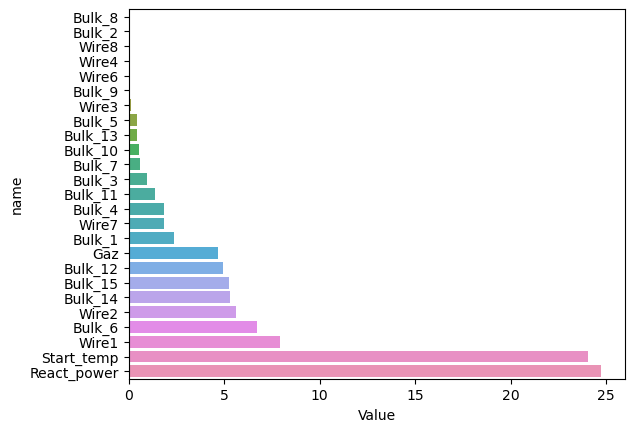

In [87]:
features_ = pd.DataFrame(
    {'Value': cat.feature_importances_, 'name': features_train.columns})
sns.barplot(x="Value", y="name", data=features_.sort_values(
    by="Value", ascending=True))
plt.show()

Итоговый вывод
я бы удалил bulk8,bulk9,wire8,wire3,wire6,bulk5,wire7,wire4


В ходе работы над проектом было выполнено.

Был проведён анализ данных в ходе которого были обработаны пропущенные значения 
Надены признаки. Составлена единая таблица  данными дляпостроения модели. Были выявлены и удалены некоторые аномалии в данных
Выбраны модели. Использованы и обучены регрессионные модели.
Оценена эффективность моделей на тестовой выборке.
Сравнение библиотеки CatBoost и LightGBM показало, что у CatBoost точность чутка выше.